In [3]:
import sympy as sy
from sympy.vector import CoordSys3D
import numpy as np
N = CoordSys3D('N')
i=N.i
j=N.j
k=N.k

def norm(BC):
    return sy.sqrt(BC.dot(BC))
def unit(BC):
    return BC/norm(BC)
def projectNorm(v1,v2):
    #projeta v1 em v2
    return v1.dot(unit(v2))
def vector(a,b,c):
    return a*i+b*j+c*k
def subValues(exp,symbolVector,valuesVector):
    for i in range(len(symbolVector)):
        exp=exp.subs(symbolVector[i],valuesVector[i])
    return exp
def angle(v1,v2):
    cos=unit(v1).dot(unit(v2))
    ang=sy.acos(cos)
    return ang #RADIANS!
def solveForces(Forcas,aplicacao,icognitas,debugON=False):
    n=len(Forcas)
    vetorAplicacao=[]
    for f in range(n):
        vetorAplicacao.append(vector(*aplicacao[f]))

    #Somatorio das forcas
    dir=[i,j,k]
    somaF=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaF[d]+=Forcas[f].dot(dir[d])
    #Somatorio dos momentos
    somaM=[0,0,0]
    for f in range(n):
        for d in range(3):
            somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
    #Resolver equacoes
    equacoes=somaF+somaM
    equacoes = [i for i in equacoes if i != 0] #eliminar zeros
    result=sy.solve(equacoes,*icognitas)
    print(result)
    res=[]

    if(debugON):
        print('Forcas')
        print(Forcas)
        print('Equacoes')
        print(equacoes)
    for icog in range(len(icognitas)):
        res.append(result[icognitas[icog]])

        
    return res
    
def resposta(r,unidade):
    if(unidade==r'^{\circ}'):
        r=np.rad2deg(float(r))
    value='{0:.2f}'.format(r)+unidade
    print('A resposta final é:')
    display(sy.symbols(value))

In [4]:
# INPUT DATA
modF=7.7
a=0.92
b=0.50
c=0.57
d=0.59
e=0.28
f=0.52

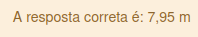

In [5]:
# INPUT DATA
a=5.3

In [6]:
d=a*3/2
resposta(d,'m')

A resposta final é:


7.95m

## 1.4)

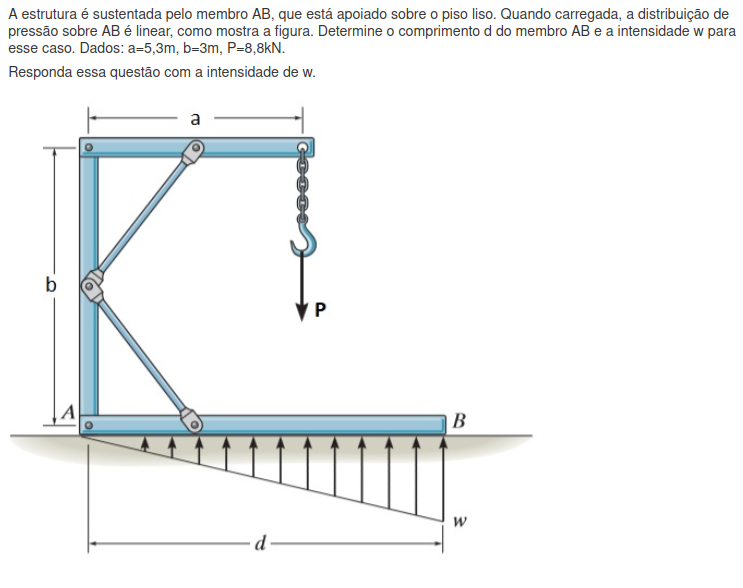

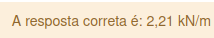

In [7]:
# INPUT DATA
a=5.3
modP=8.8

In [8]:
w=(4/3)*modP/a
resposta(w,'kN/m')

A resposta final é:


2.21kN/m

## 1.5)

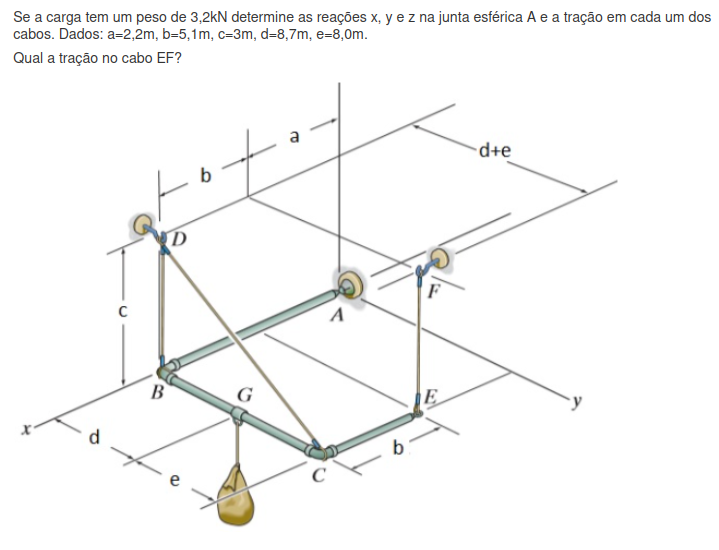

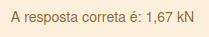

In [9]:
# INPUT DATA
a=2.2
b=5.1
c=3
d=8.7
e=8
P=3.2

In [10]:
modTef=(d*P/(d+e))
resposta(modTef,'kN')

A resposta final é:


1.67kN

In [11]:
#Prova Real
aplicacao=[
    [0,0,0], #RA
    [a+b,0,0], #Tbd
    [a+b,d+e,0], #Tcd
    [a,d+e,0],
    [a+b,d,0]]
aplicacao
Tbd,Tcd,Tef,RAx,RAy,RAz = sy.symbols('Tbd Tcd Tef RAx RAy RAz')

vTbd=Tbd*vector(0,0,1)
vTef=Tef*vector(0,0,1)
vTcd=Tcd*1/(sy.sqrt((d+e)**2+c**2))*vector(-d-e,c,0)
vP  =P*vector(0,0,-1)
vRA=vector(RAx,RAy,RAz)

Forcas=[vRA,vTbd,vTcd,vTef,vP]
icognitas=[RAx,RAy,RAz,Tbd,Tcd,Tef]
res=solveForces(Forcas,aplicacao,icognitas)[-1]
resposta(res,'kN')

{RAx: 0.0, RAy: 0.0, Tcd: 0.0, RAz: -1.16466245591010, Tbd: 2.69759658764662, Tef: 1.66706586826347}
A resposta final é:


1.67kN

## 1.6)

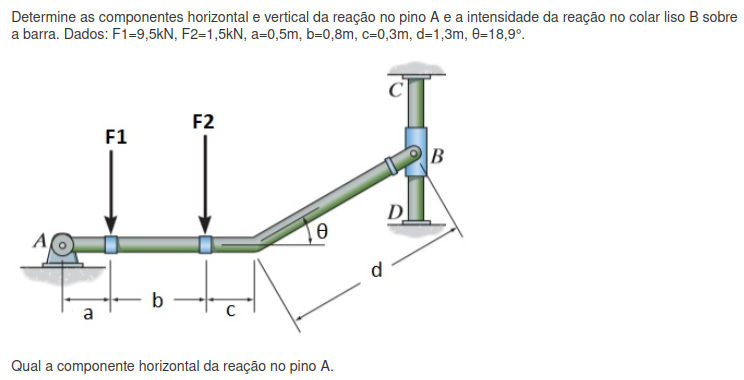

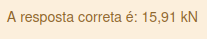

In [12]:
#INput data
a=0.5
b=0.8
c=0.3
d=1.3
thetad=18.9
F1=9.5
F2=1.5

In [13]:
theta=np.deg2rad(thetad)
Ra=(F1*a+F2*(a+b))/(d*sy.sin(theta))
resposta(Ra,'kN')

A resposta final é:


15.91kN

In [14]:
#Prova Real
RAx,RAy,RBx = sy.symbols('RAx RAy RBx')
#a,b,theta, r, F1, F2, F3 = sy.symbols(r'a b \theta r F_1 F_2 F_3')
aplicacao=[
    [0,0,0],
    [a,0,0],
    [a+b,0,0],
    [a+b+c+d*sy.cos(theta),d*sy.sin(theta),0]]
vRA  =vector(RAx,RAy,0)
vF1  =F1*vector(0,-1,0)
vF2  =F2*vector(0,-1,0)
vRB  =vector(RBx,0,0)

Forcas=[vRA,vF1,vF2,vRB]
icognitas=[RAx,RAy,RBx]
solveForces(Forcas,aplicacao,icognitas,True)[0]

{RAx: 15.9109879997049, RBx: -15.9109879997049, RAy: 11.0000000000000}
Forcas
[RAx*N.i + RAy*N.j, (-9.5)*N.j, (-1.5)*N.j, RBx*N.i]
Equacoes
[RAx + RBx, RAy - 11.0, -0.421092643657594*RBx - 6.7]


15.9109879997049

## 1.7)

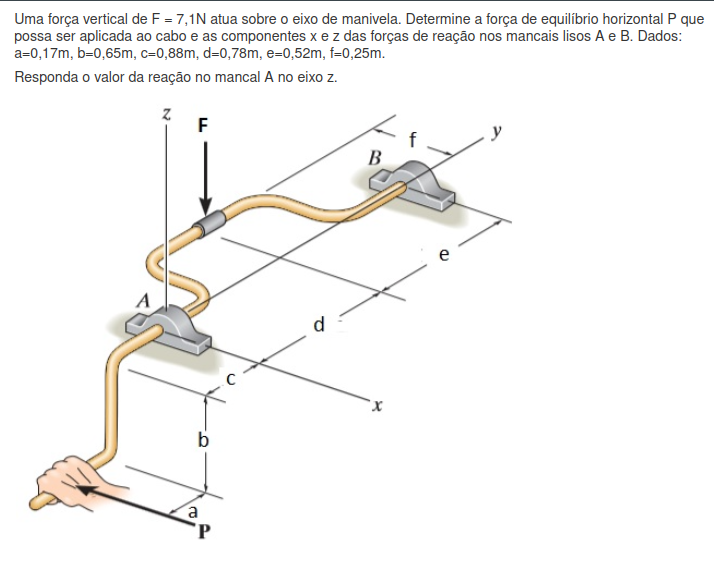

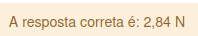

In [15]:
#input data
F=7.1
d=0.78
e=0.52

In [16]:
Ra=F*(1-d/(d+e))
resposta(Ra,'N')

A resposta final é:


2.84N

## 1.8)

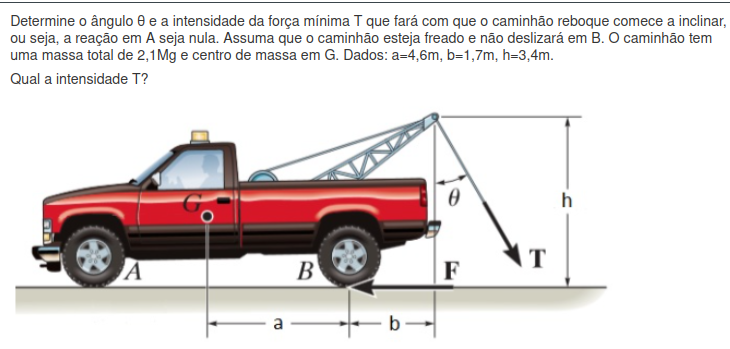

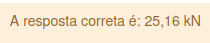

In [17]:
#input data
a=4.6
b=1.7
h=3.4
m=2.1

In [18]:
P=m*9.8
theta=sy.atan(h/b)
T=P*a/(sy.cos(theta)*b+sy.sin(theta)*h)
resposta(T,'kN')

A resposta final é:


24.90kN

## 1.9)

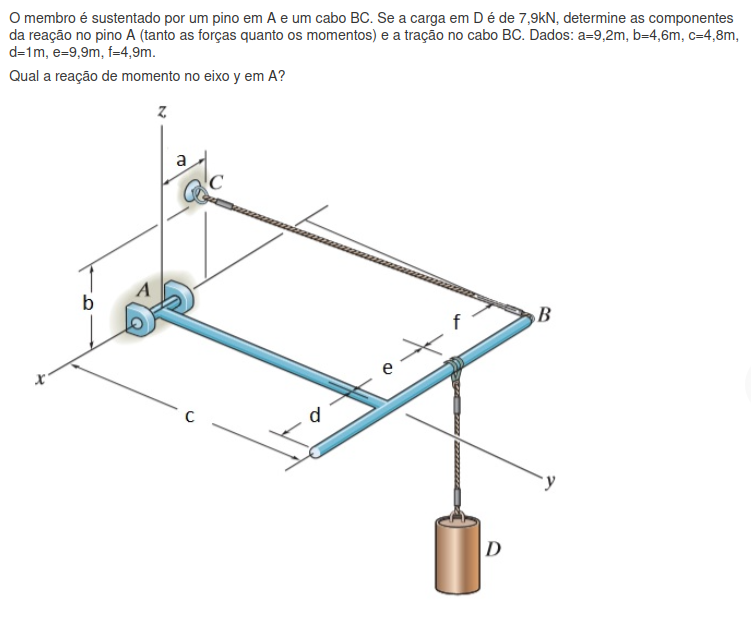

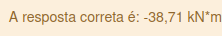

In [19]:
#INPUT DATA
a=9.2
b=4.6
c=4.8
d=1
e=9.9
f=4.9
P=7.9

In [20]:
DX=a-(f+e)
DY=c
DZ=b
H=sy.sqrt(DX**2+DY**2+DZ**2)
modT=P*H/DZ
modMAy=-P*f
resposta(modMAy,'kN*m')
print('COLOCAR SINAL DE MENOS!!!!!!!!!')

A resposta final é:


-38.71kN*m

COLOCAR SINAL DE MENOS!!!!!!!!!


In [21]:
#Prova Real
aplicacao=[
    [-e,c,0],
    [-e-f,c,0],
    [0,0,0]]
aplicacao
RARAy,RAz,MAy,MAz,T = sy.symbols('RAy RAz MAy MAz T')

vRA =    vector(0,RAy,RAz)
vP  =P  *vector(0,0,-1)
vT  =T  *vector(DX/H,DY/H,DZ/H)
Forcas=[vRA,vP,vT]
#print(Forcas)

#print(icognitas)
n=len(Forcas)
vetorAplicacao=[]
for f in range(n):
    vetorAplicacao.append(vector(*aplicacao[f]))

#Somatorio das forcas
dir=[i,j,k]
somaF=[0,0,0]
for f in range(n):
    for d in range(3):
        somaF[d]+=Forcas[f].dot(dir[d])
#Somatorio dos momentos


somaM=[0,MAy,MAz]
for f in range(n):
    for d in range(3):
        somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
#Resolver equacoes
equacoes=somaF+somaM
equacoes = [i for i in equacoes if i != 0] #eliminar zeros
print(equacoes)
icognitas=[RAy,RAz,T,MAy,MAz]
result=sy.solve(equacoes,*icognitas)
print(result)
res=[]
for icog in range(len(icognitas)):
    res.append(result[icognitas[icog]])
res[-2]


[-0.644231642920932*T, RAy + 0.552198551075085*T, RAz + 0.529190278113623*T - 7.9, 4.8*RAz - 37.92, MAy + 9.9*RAz - 116.92, MAz - 9.9*RAy]
{RAy: 0.0, RAz: 7.90000000000000, T: 0.0, MAy: 38.7100000000000, MAz: 0.0}


38.7100000000000

## 1.10)

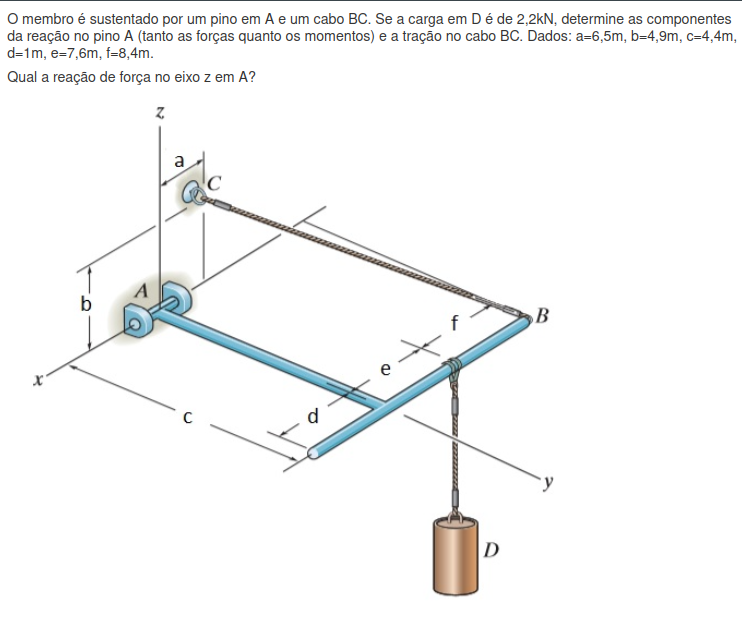

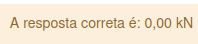

In [22]:
#INPUT DATA

In [23]:
resposta(0,'kN')

A resposta final é:


0.00kN

# T2

## 2.1)

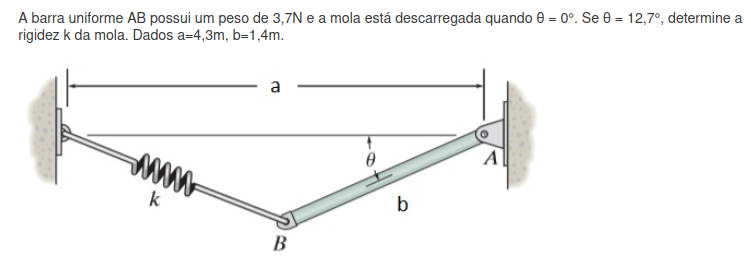

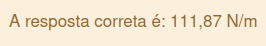

In [24]:
#input data
P=3.7
thetad=12.7
a=4.3
b=1.4

In [25]:
theta=np.deg2rad(thetad)
L0=a-b
Lf=sy.sqrt((a-b*sy.cos(theta))**2+(b*sy.sin(theta))**2)
T=Lf*P/(2*a*sy.tan(theta))
kcte=T/(Lf-L0)
resposta(kcte,'N/m')

A resposta final é:


111.87N/m

In [26]:
#prova real
P,theta,a,b,Lf=sy.symbols(r'P \theta a b Lf')
#Lf=sy.sqrt((a-b*sy.cos(theta))**2+(b*sy.sin(theta))**2)
T,RAx,RAy=sy.symbols('T RAx RAy')
aplicacao=[[0,0,0],[b*sy.cos(theta)/2,b*sy.sin(theta)/2,0],[b*sy.cos(theta),b*sy.sin(theta),0],[b*sy.cos(theta),b*sy.sin(theta),0]]
vT=T*vector(-(a-b*sy.cos(theta))/Lf,b*sy.sin(theta)/Lf,0)
vP=P*vector(0,-1,0)
vRAx=RAx*vector(1,0,0)
vRAy=RAy*vector(0,1,0)
Forcas=[vT,vP,vRAx,vRAy]
icognitas=[T,RAx,RAy]
res=solveForces(Forcas,aplicacao,icognitas)

{T: Lf*P*cos(\theta)/(2*a*sin(\theta)), RAx: P*cos(\theta)/(2*sin(\theta)) - P*b*cos(\theta)**2/(2*a*sin(\theta)), RAy: P - P*b*cos(\theta)/(2*a)}


In [27]:
T=res[0]
T=sy.simplify(T)
display(T)
print(T)

Lf*P/(2*a*tan(\theta))

Lf*P/(2*a*tan(\theta))


## 2.2)

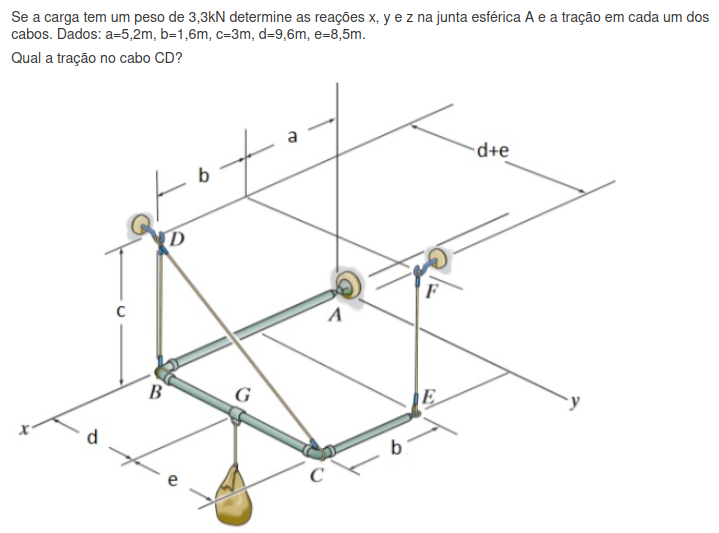

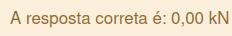

In [28]:
#Input data
a=5.2
b=1.6
c=3
d=9.6
e=8.5
P=3.3

In [29]:
resposta(0,'kN')

A resposta final é:


0.00kN

In [30]:
#Prova Real
aplicacao=[
    [0,0,0], #RA
    [a+b,0,0], #Tbd
    [a+b,d+e,0], #Tcd
    [a,d+e,0],
    [a+b,d,0]]
aplicacao
Tbd,Tcd,Tef,RAx,RAy,RAz = sy.symbols('Tbd Tcd Tef RAx RAy RAz')

vTbd=Tbd*vector(0,0,1)
vTef=Tef*vector(0,0,1)
vTcd=Tcd*1/(sy.sqrt((d+e)**2+c**2))*vector(-d-e,c,0)
vP  =P*vector(0,0,-1)
vRA=vector(RAx,RAy,RAz)

Forcas=[vRA,vTbd,vTcd,vTef,vP]
icognitas=[RAx,RAy,RAz,Tbd,Tcd,Tef]
res=solveForces(Forcas,aplicacao,icognitas)[-2]
resposta(res,'kN')

{RAx: 0.0, RAy: 0.0, Tcd: 0.0, RAz: -0.411829704257394, Tbd: 1.96155346116347, Tef: 1.75027624309392}
A resposta final é:


0.00kN

## 2.3)

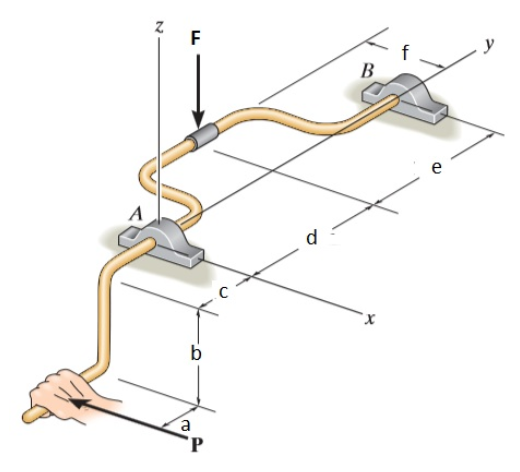

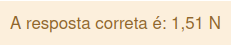

In [31]:
#input data
modF=6.7
f=0.2
b=0.89

In [32]:
modP=modF*f/b
resposta(modP,'N')

A resposta final é:


1.51N

## 2.4)

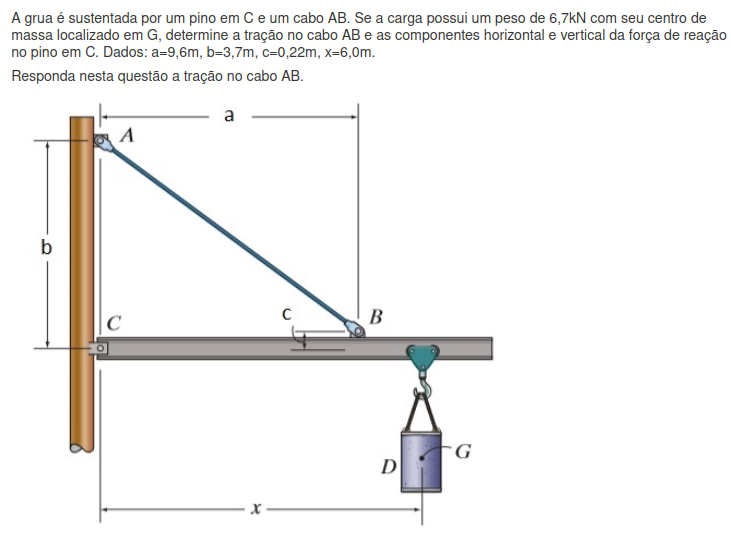

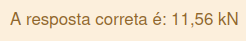

In [33]:
#input
a=9.6
b=3.7
c=0.22
x=6
P=6.7

In [34]:
H=sy.sqrt(a**2+(b-c)**2)
T=P*x*H/(b*a)
resposta(T,'kN')

A resposta final é:


11.56kN

In [35]:
#prova real
T,RCx,RCy = sy.symbols('T RCx RCy')
aplicacao=[[a,c,0],[x,0,0],[0,0,0],[0,0,0]]
vT=T*vector(-a/H,(b-c)/H,0)
vP=P*vector(0,-1,0)
vRCx=RCx*vector(1,0,0)
vRCy=RCy*vector(0,1,0)
Forcas=[vT,vP,vRCx,vRCy]
icognitas=[T,RCx,RCy]
solveForces(Forcas,aplicacao,icognitas)

{T: 11.5566940440553, RCx: 10.8648648648649, RCy: 2.76148648648649}


[11.5566940440553, 10.8648648648649, 2.76148648648649]

## 2.5)

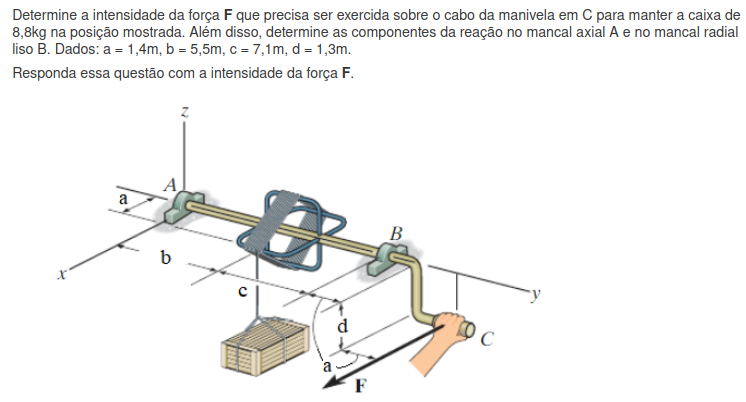

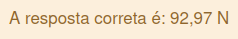

In [36]:
#input data
m=8.8
g=9.8
a=1.4
b=5.5
c=7.1
d=1.3

In [37]:
P=m*g
F=m*g*a/d
resposta(F,'N')

A resposta final é:


92.87N

In [38]:
#Prova Real
aplicacao=[
    [0,0,0],
    [0,0,0],
    [0,b+c,0],
    [0,b+c,0],
    [0,b+c+a+a,-d],
    [a,b,0]]
aplicacao
F,RAx,RAz,RBx,RBz = sy.symbols('F RAx RAz RBx RBz')

vF  =F  *vector(1,0,0)
vP  =P  *vector(0,0,-1)
vRAx=RAx*vector(1,0,0)
vRAz=RAz*vector(0,0,1)
vRBx=RBx*vector(1,0,0)
vRBz=RBz*vector(0,0,1)

Forcas=[vRAx,vRAz,vRBx,vRBz,vF,vP]
icognitas=[RAx,RAz,RBx,RBz,F]
solveForces(Forcas,aplicacao,icognitas)[-1]

{RAx: 20.6386324786325, RBx: -113.512478632479, F: 92.8738461538462, RAz: 48.5955555555556, RBz: 37.6444444444444}


92.8738461538462

## 2.6)

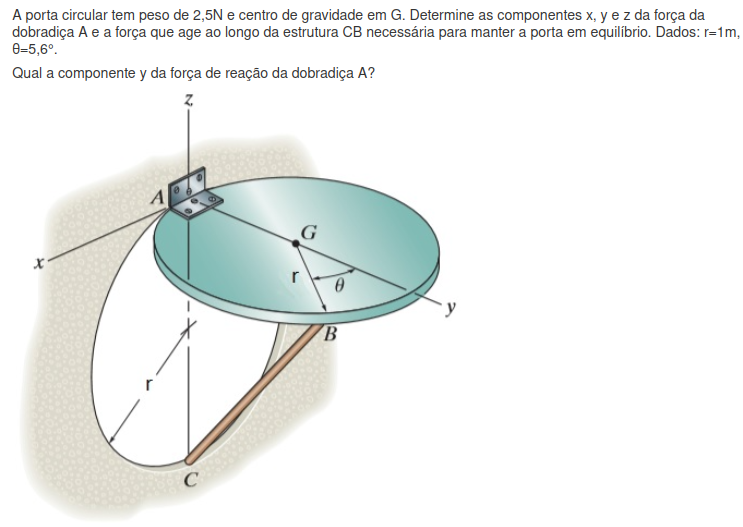

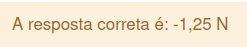

In [39]:
#input data
P=2.5
r=1
thetad=5.6

In [40]:
theta=np.deg2rad(thetad)
Ry=-P/(1+sy.cos(theta))
resposta(Ry,'N')

A resposta final é:


-1.25N

In [41]:
#Prova Real
aplicacao=[
    [0,0,0],
    [0,r,0],
    [-r*sy.sin(theta),r*(1+sy.cos(theta)),0]]
aplicacao
RAx,RAy,RAz,T = sy.symbols('RAx RAy RAz T')

vRA =    vector(RAx,RAy,RAz)
vP  =P  *vector(0,0,-1)
vT  =T  *unit(vector(r*sy.sin(theta),r*(1+sy.cos(theta)),2*r))

Forcas=[vRA,vP,vT]
#print(Forcas)

#print(icognitas)
n=len(Forcas)
vetorAplicacao=[]
for f in range(n):
    vetorAplicacao.append(vector(*aplicacao[f]))

#Somatorio das forcas
dir=[i,j,k]
somaF=[0,0,0]
for f in range(n):
    for d in range(3):
        somaF[d]+=Forcas[f].dot(dir[d])
#Somatorio dos momentos

MAy,MAz = sy.symbols('MAy MAz')

somaM=[0,MAy,MAz]
for f in range(n):
    for d in range(3):
        somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
#Resolver equacoes
equacoes=somaF+somaM
equacoes = [i for i in equacoes if i != 0] #eliminar zeros
#print(equacoes)
icognitas=[RAx,RAy,RAz,T,MAy,MAz]
result=sy.solve(equacoes,*icognitas)
#print(result)
res=[]
for icog in range(len(icognitas)):
    res.append(result[icognitas[icog]])
res[1]

-1.25000000000000

## 2.7)

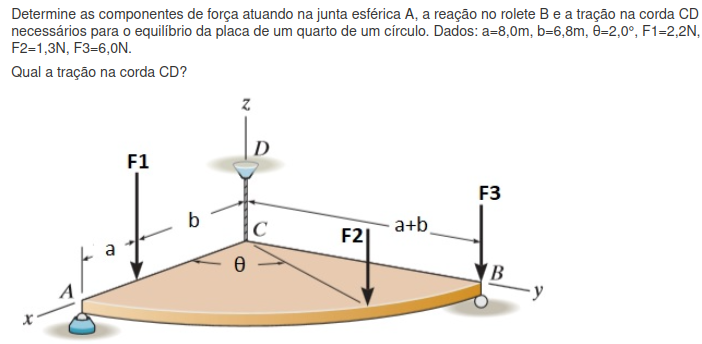

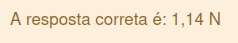

In [42]:
#input
a=8
b=6.8
thetad=2
F1=2.2
F2=1.3
F3=6

In [43]:
r=a+b
theta=np.deg2rad(thetad)
RBz=F2*sy.sin(theta)+F3
RAz=(F1*b+F2*r*sy.cos(theta))/r
T=F1+F2+F3-RAz-RBz
resposta(T,'N')

A resposta final é:


1.14N

In [44]:
#Prova Real
T,RA,RB = sy.symbols('T RA RB')
#a,b,theta, r, F1, F2, F3 = sy.symbols(r'a b \theta r F_1 F_2 F_3')
aplicacao=[
    [0,0,0],
    [b,0,0],
    [r*sy.cos(theta),r*sy.sin(theta),0],
    [0,r,0],
    [r,0,0],
    [0,r,0]]
vT   =T *vector(0,0,1)
vF1  =F1*vector(0,0,-1)
vF2  =F2*vector(0,0,-1)
vF3  =F3*vector(0,0,-1)
vRA  =RA*vector(0,0,1)
vRB  =RB*vector(0,0,1)

Forcas=[vT,vF1,vF2,vF3,vRA,vRB]
icognitas=[RA,RB,T]
solveForces(Forcas,aplicacao,icognitas)[-1]

{RA: 2.31001888593563, RB: 6.04536934571325, T: 1.14461176835111}


1.14461176835111

## 2.8)

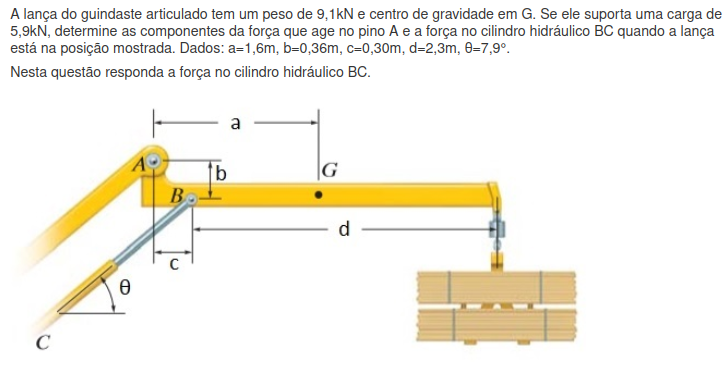

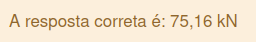

In [45]:
#input data
modPL=9.1
modPC=5.9
a=1.6
b=0.36
c=0.3
d=2.3
thetad=7.9

In [46]:
theta=np.deg2rad(thetad)
RAy=(-modPL*(a-c)-modPC*d+b/sy.tan(theta)*(modPL+modPC))/(c+b/sy.tan(theta))
RAx=(RAy-modPL-modPC)/sy.tan(theta)
modT=-RAx/sy.cos(theta)
resposta(modT,'kN')

A resposta final é:


75.16kN

In [47]:
#prova real
#a,b,c,d,modPL,modPC,theta=sy.symbols(r'a b c d P_L P_C \theta')
modRAy,modRAx,modT=sy.symbols('RAy RAx T')
PL=-j*modPL
PC=-j*modPC
RAx=modRAx*i
RAy=modRAy*j
T=modT*(i*sy.cos(theta)+j*sy.sin(theta))
Forcas=[PL,PC,RAx,RAy,T]
aplicacao=[[a-c,0,0],[d,0,0],[-c,b,0],[-c,b,0],[0,0,0]]
icognitas=[modRAy,modRAx,modT]
solveForces(Forcas,aplicacao,icognitas)

{RAy: 4.66963629876452, RAx: -74.4469191378593, T: 75.1602300643017}


[4.66963629876452, -74.4469191378593, 75.1602300643017]

## 2.9)

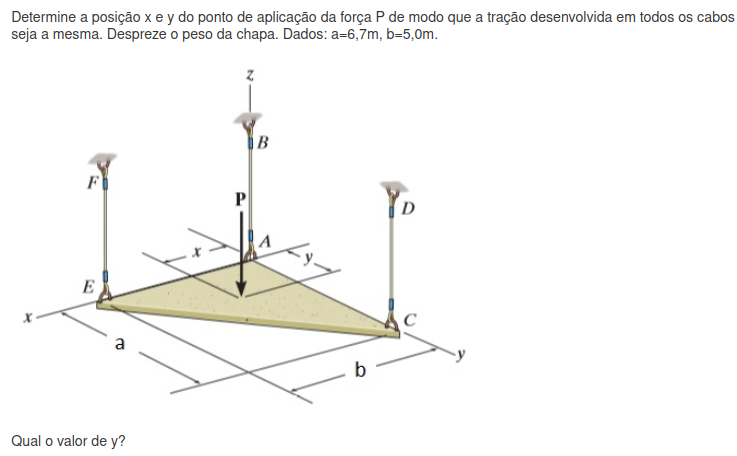

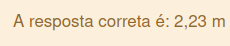

In [48]:
#input data
a=6.7
b=5

In [49]:
y=a/3
x=b/3;
resposta(y,'m')

A resposta final é:


2.23m

In [50]:
x

1.6666666666666667

In [51]:
#Prova Real
T,x,y = sy.symbols('T x y')
#a,b,theta, r, F1, F2, F3 = sy.symbols(r'a b \theta r F_1 F_2 F_3')
aplicacao=[
    [b,0,0],
    [0,0,0],
    [0,a,0],
    [x,y,0]]
vF  =T*vector(0,0,1)
vB  =T*vector(0,0,1)
vD  =T*vector(0,0,1)
vP  =P*vector(0,0,-1)

Forcas=[vF,vB,vD,vP]
icognitas=[T,x,y]
solveForces(Forcas,aplicacao,icognitas)[-1]

{T: 0.833333333333333, x: 1.66666666666667, y: 2.23333333333333}


2.23333333333333

## 2.10)

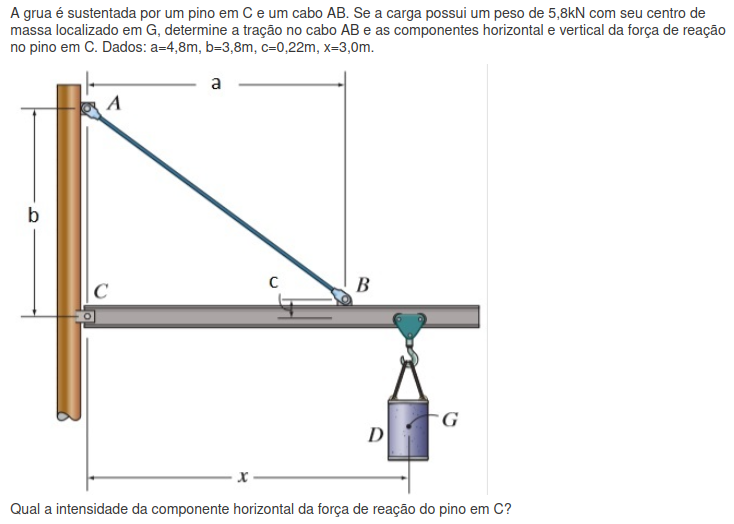

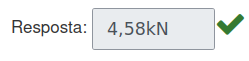

In [52]:
#input
a=4.8
b=3.8
c=0.22
x=3
P=5.8

In [53]:
H=(a**2+(b-c)**2)**0.5
T=P*x*H/(b*a)
RCx=T*a/H
RCx=P*x/b
resposta(RCx,'kN')

A resposta final é:


4.58kN

In [54]:
#prova real
T,RCx,RCy = sy.symbols('T RCx RCy')
aplicacao=[[a,c,0],[x,0,0],[0,0,0],[0,0,0]]
vT=T*vector(-a/H,(b-c)/H,0)
vP=P*vector(0,-1,0)
vRCx=RCx*vector(1,0,0)
vRCy=RCy*vector(0,1,0)
Forcas=[vT,vP,vRCx,vRCy]
icognitas=[T,RCx,RCy]
solveForces(Forcas,aplicacao,icognitas)[1]

{T: 5.71225723372938, RCx: 4.57894736842106, RCy: 2.38486842105263}


4.57894736842106

# T3

## 3.1)

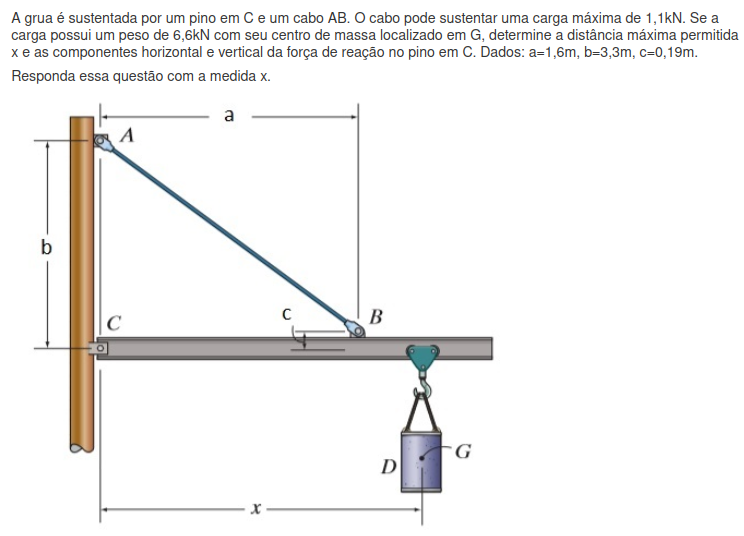

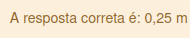

In [55]:
#input data
P=6.6
T=1.1
a=1.6
b=3.3
c=0.19

In [56]:
#prova real
H=(a**2+(b-c)**2)**0.5
RCx,RCy,x = sy.symbols('RCx RCy x')
aplicacao=[[a,c,0],[x,0,0],[0,0,0],[0,0,0]]
vT=T*vector(-a/H,(b-c)/H,0)
vP=P*vector(0,-1,0)
vRCx=RCx*vector(1,0,0)
vRCy=RCy*vector(0,1,0)
Forcas=[vT,vP,vRCx,vRCy]
icognitas=[x,RCx,RCy]
x=solveForces(Forcas,aplicacao,icognitas)[0]
resposta(x,'m')

{RCx: 0.503224939567437, RCy: 5.62185652371579, x: 0.251612469783718}
A resposta final é:


0.25m

In [57]:
x

0.251612469783718

## 3.2)

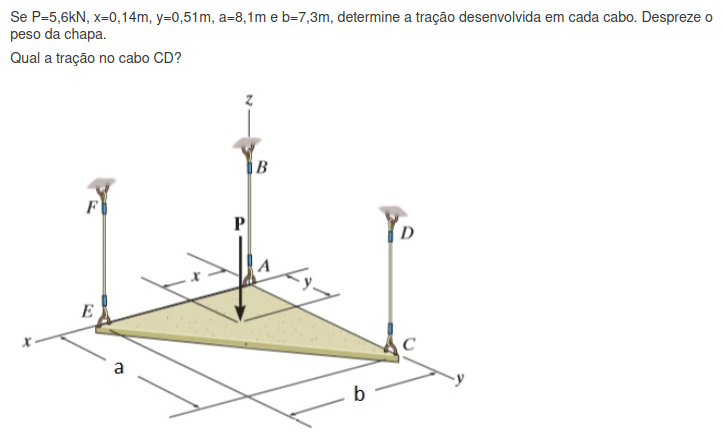

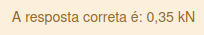

In [58]:
#input data
P=5.6
x=0.14
y=0.51
a=8.1
b=7.3

In [59]:
#Prova Real
F,B,D = sy.symbols('F B D')
#a,b,theta, r, F1, F2, F3 = sy.symbols(r'a b \theta r F_1 F_2 F_3')
aplicacao=[
    [b,0,0],
    [0,0,0],
    [0,a,0],
    [x,y,0]]
vF  =F*vector(0,0,1)
vB  =B*vector(0,0,1)
vD  =D*vector(0,0,1)
vP  =P*vector(0,0,-1)

Forcas=[vF,vB,vD,vP]
icognitas=[F,B,D]
res=solveForces(Forcas,aplicacao,icognitas)[-1]
resposta(res,'kN')

{F: 0.107397260273973, B: 5.14001014713343, D: 0.352592592592593}
A resposta final é:


0.35kN

## 3.3)

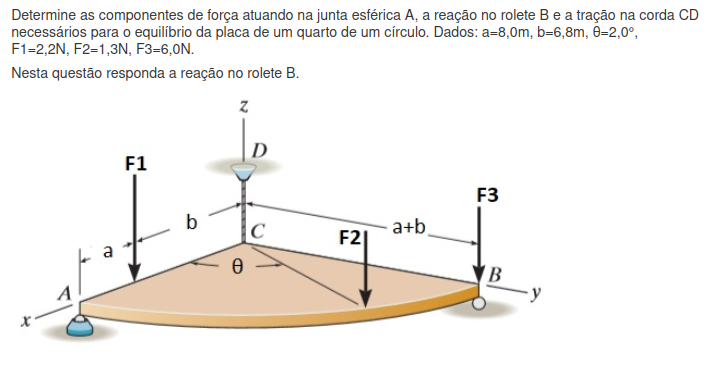

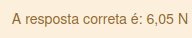

In [60]:
#input data
a=8
b=6.8
thetad=2
F1=2.2
F2=1.3
F3=6

In [61]:
#Prova Real
theta=np.deg2rad(thetad)
T,RA,RB = sy.symbols('T RA RB')
#a,b,theta, r, F1, F2, F3 = sy.symbols(r'a b \theta r F_1 F_2 F_3')
aplicacao=[
    [0,0,0],
    [b,0,0],
    [r*sy.cos(theta),r*sy.sin(theta),0],
    [0,r,0],
    [r,0,0],
    [0,r,0]]
vT   =T *vector(0,0,1)
vF1  =F1*vector(0,0,-1)
vF2  =F2*vector(0,0,-1)
vF3  =F3*vector(0,0,-1)
vRA  =RA*vector(0,0,1)
vRB  =RB*vector(0,0,1)

Forcas=[vT,vF1,vF2,vF3,vRA,vRB]
icognitas=[RA,RB,T]
RB=solveForces(Forcas,aplicacao,icognitas)[1]
resposta(RB,'N')

{RA: 2.31001888593563, RB: 6.04536934571325, T: 1.14461176835111}
A resposta final é:


6.05N

## 3.4)

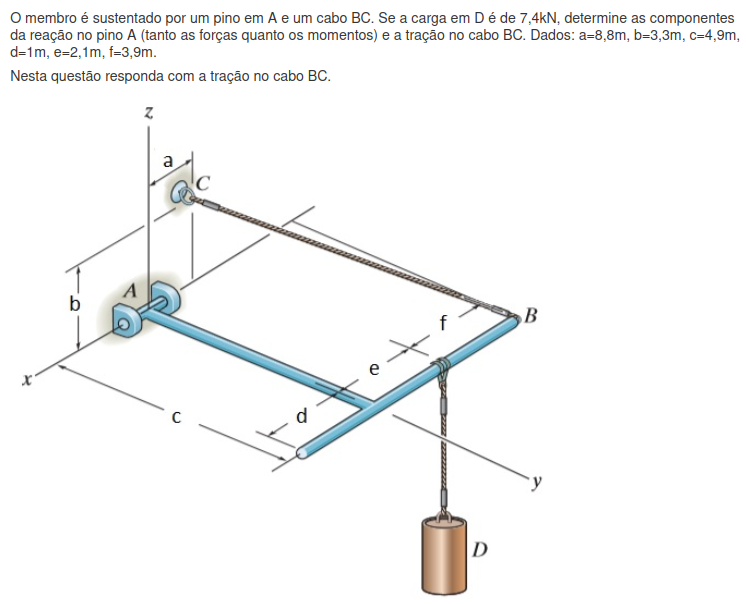

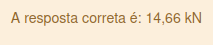

In [62]:
#INPUT DATA
a=8.8
b=3.3
c=4.9
d=1
e=2.1
f=3.9
P=7.4

In [63]:
DX=a-(f+e)
DY=c
DZ=b
H=(DX**2+DY**2+DZ**2)**0.5
#Prova Real
aplicacao=[
    [0,0,0],
    [-e,c,0],
    [-e-f,c,0]]
aplicacao
RAx,RAy,RAz,MAy,MAz,T = sy.symbols('RAx RAy RAz MAy MAz T')

vRA =    vector(RAx,RAy,RAz)
vP  =P  *vector(0,0,-1)
vT  =T  *vector(DX/H,DY/H,DZ/H)
Forcas=[vRA,vP,vT]
#print(Forcas)

#print(icognitas)
n=len(Forcas)
vetorAplicacao=[]
for ff in range(n):
    vetorAplicacao.append(vector(*aplicacao[ff]))

#Somatorio das forcas
dir=[i,j,k]
somaF=[0,0,0]
for ff in range(n):
    for d in range(3):
        somaF[d]+=Forcas[ff].dot(dir[d])
#Somatorio dos momentos


somaM=[0,MAy,MAz]
for ff in range(n):
    for d in range(3):
        somaM[d]+=(vetorAplicacao[ff].cross(Forcas[ff])).dot(dir[d])
#Resolver equacoes
equacoes=somaF+somaM
equacoes = [i for i in equacoes if i != 0] #eliminar zeros
print(equacoes)
icognitas=[RAx,RAy,RAz,T,MAy,MAz]
result=sy.solve(equacoes,*icognitas)
#print(result)
res=[]
for icog in range(len(icognitas)):
    res.append(result[icognitas[icog]])
resposta(res[3],'kN')

[RAx + 0.428292798879806*T, RAy + 0.74951239803966*T, RAz + 0.504773655822628*T - 7.4, 2.47339091353088*T - 36.26, MAy + 3.02864193493577*T - 15.54, MAz - 6.59570910274901*T]
A resposta final é:


14.66kN

## 3.5)

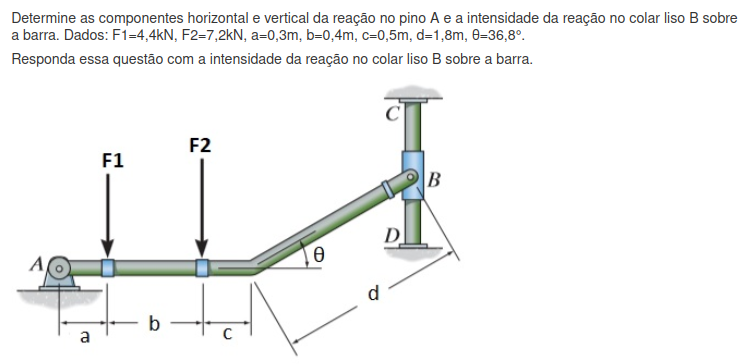

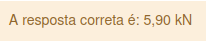

In [64]:
#INput data
a=0.3
b=0.4
c=0.5
d=1.8
thetad=36.8
F1=4.4
F2=7.2

In [65]:
#referencia
a=1
b=2
c=1
F1=300
F2=450
thetad=30

In [66]:
#Prova Real
theta=np.deg2rad(thetad)
RAx,RAy,RBx = sy.symbols('RAx RAy RBx')
#a,b,theta, r, F1, F2, F3 = sy.symbols(r'a b \theta r F_1 F_2 F_3')
aplicacao=[
    [0,0,0],
    [a,0,0],
    [a+b,0,0],
    [a+b+c+d*sy.cos(theta),d*sy.sin(theta),0]]
vRA  =vector(RAx,RAy,0)
vF1  =F1*vector(0,-1,0)
vF2  =F2*vector(0,-1,0)
vRB  =vector(RBx,0,0)

Forcas=[vRA,vF1,vF2,vRB]
icognitas=[RAx,RAy,RBx]
res=solveForces(Forcas,aplicacao,icognitas,True)[-1]
resposta(abs(res),'kN')

{RAx: 1833.33333333333, RBx: -1833.33333333333, RAy: 750.000000000000}
Forcas
[RAx*N.i + RAy*N.j, (-300)*N.j, (-450)*N.j, RBx*N.i]
Equacoes
[RAx + RBx, RAy - 750, -0.9*RBx - 1650]
A resposta final é:


1833.33kN

## 3.6)

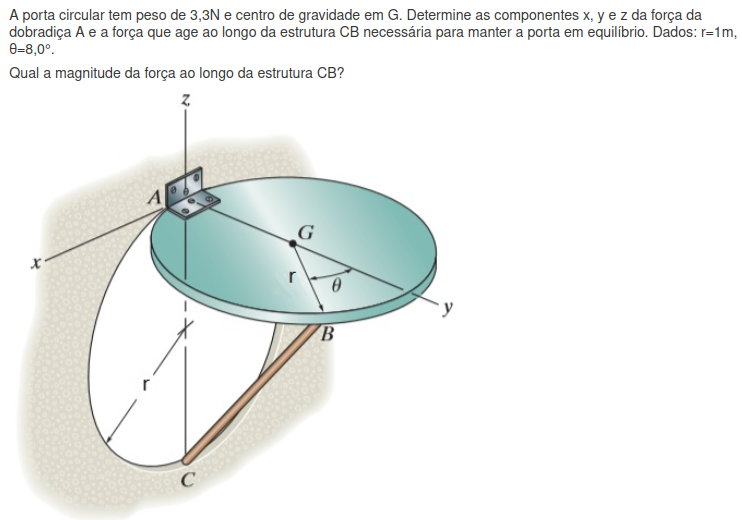

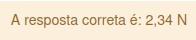

In [1]:
#input data
P=3.3
r=1
thetad=8

In [68]:
#Prova Real
theta=np.deg2rad(thetad)
aplicacao=[
    [0,0,0],
    [0,r,0],
    [r*sy.sin(theta),r*(1+sy.cos(theta)),0]]
aplicacao
RAx,RAy,RAz,T = sy.symbols('RAx RAy RAz T')

vRA =    vector(RAx,RAy,RAz)
vP  =P  *vector(0,0,-1)
vT  =T  *unit(vector(r*sy.sin(theta),r*(1+sy.cos(theta)),2*r))
#print(vT)
Forcas=[vRA,vP,vT]
#print(Forcas)

#print(icognitas)
n=len(Forcas)
vetorAplicacao=[]
for f in range(n):
    vetorAplicacao.append(vector(*aplicacao[f]))

#Somatorio das forcas
dir=[i,j,k]
somaF=[0,0,0]
for f in range(n):
    for d in range(3):
        somaF[d]+=Forcas[f].dot(dir[d])
#Somatorio dos momentos

MAy,MAz = sy.symbols('MAy MAz')

somaM=[0,MAy,MAz]
for f in range(n):
    for d in range(3):
        somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
#Resolver equacoes
equacoes=somaF+somaM
equacoes = [i for i in equacoes if i != 0] #eliminar zeros
#print(equacoes)
icognitas=[RAx,RAy,RAz,T,MAy,MAz]
result=sy.solve(equacoes,*icognitas)
print(result)
res=[]
for icog in range(len(icognitas)):
    res.append(result[icognitas[icog]])
resposta(res[3],'N')

{RAx: -0.115379239706792, RAy: -1.65000000000000, RAz: 1.64193189760284, T: 2.34200815565238, MAy: 0.230758479413585, MAz: 0.0}
A resposta final é:


2.34N

## 3.7)

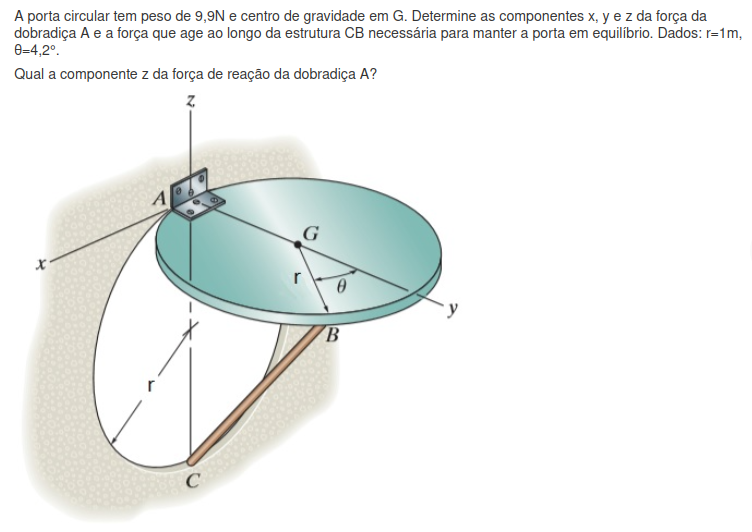

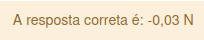

In [69]:
#input data
P=9.9
r=1
thetad=4.2

In [70]:
theta=np.deg2rad(thetad)
Rx=-P*sy.sin(theta)/(2*(1+sy.cos(theta)))
Rz=P*(1-1/(1+sy.cos(theta)))
Ry=-P/2
resposta(Rz,'N')

A resposta final é:


4.94N

In [71]:
print(Rx)
print(Ry)
print(Rz)

-0.181508260174212
-4.95
4.94334439424011


In [72]:
#Prova Real
theta=np.deg2rad(thetad)
aplicacao=[
    [0,0,0],
    [0,r,0],
    [r*sy.sin(theta),r*(1+sy.cos(theta)),0]]
aplicacao
RAx,RAy,RAz,T = sy.symbols('RAx RAy RAz T')

vRA =    vector(RAx,RAy,RAz)
vP  =P  *vector(0,0,-1)
vT  =T  *unit(vector(r*sy.sin(theta),r*(1+sy.cos(theta)),2*r))
#print(vT)
Forcas=[vRA,vP,vT]
#print(Forcas)

#print(icognitas)
n=len(Forcas)
vetorAplicacao=[]
for f in range(n):
    vetorAplicacao.append(vector(*aplicacao[f]))

#Somatorio das forcas
dir=[i,j,k]
somaF=[0,0,0]
for f in range(n):
    for d in range(3):
        somaF[d]+=Forcas[f].dot(dir[d])
#Somatorio dos momentos

MAy,MAz = sy.symbols('MAy MAz')

somaM=[0,MAy,MAz]
for f in range(n):
    for d in range(3):
        somaM[d]+=(vetorAplicacao[f].cross(Forcas[f])).dot(dir[d])
#Resolver equacoes
equacoes=somaF+somaM
equacoes = [i for i in equacoes if i != 0] #eliminar zeros
print(equacoes)
icognitas=[RAx,RAy,RAz,T,MAy,MAz]
result=sy.solve(equacoes,*icognitas)
print(result)
res=[]
for icog in range(len(icognitas)):
    res.append(result[icognitas[icog]])
resposta(res[2],'N')

[RAx + 0.0259023095306157*T, RAy + 0.706394475124632*T, RAz + 0.707344269697844*T - 9.9, 1.41278895024926*T - 9.9, MAy - 0.0518046190612313*T, MAz + 6.93889390390723e-18*T]
{RAx: -0.181508260174213, RAy: -4.95000000000001, RAz: 4.94334439424009, T: 7.00741607460430, MAy: 0.363016520348425, MAz: -4.86237166822133e-17}
A resposta final é:


4.94N

In [73]:
display(vT)
vT.subs(T,res[-3])

0.0259023095306157*T*N.i + 0.706394475124632*T*N.j + 0.707344269697844*T*N.k

0.181508260174212*N.i + 4.95000000000002*N.j + 4.95665560575991*N.k

In [74]:
T

T

## 3.8)

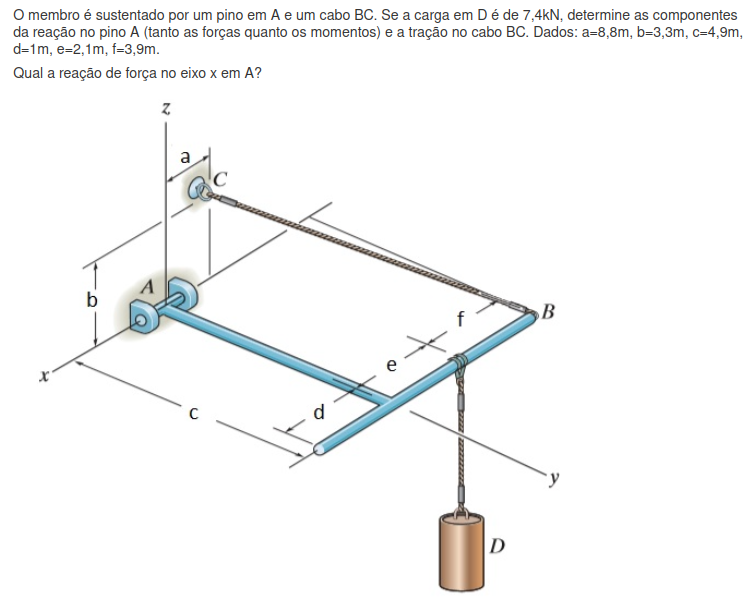

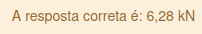

In [75]:
#INPUT DATA
a=8.8
b=3.3
c=4.9
d=1
e=2.1
f=3.9
P=7.4

In [76]:
DX=a-(f+e)
DY=c
DZ=b
H=(DX**2+DY**2+DZ**2)**0.5
#Prova Real
aplicacao=[
    [0,0,0],
    [-e,c,0],
    [-e-f,c,0]]
aplicacao
RAx,RAy,RAz,MAy,MAz,T = sy.symbols('RAx RAy RAz MAy MAz T')

vRA =    vector(RAx,RAy,RAz)
vP  =P  *vector(0,0,-1)
vT  =T  *vector(DX/H,DY/H,DZ/H)
Forcas=[vRA,vP,vT]
#print(Forcas)

#print(icognitas)
n=len(Forcas)
vetorAplicacao=[]
for ff in range(n):
    vetorAplicacao.append(vector(*aplicacao[ff]))

#Somatorio das forcas
dir=[i,j,k]
somaF=[0,0,0]
for ff in range(n):
    for d in range(3):
        somaF[d]+=Forcas[ff].dot(dir[d])
#Somatorio dos momentos


somaM=[0,MAy,MAz]
for ff in range(n):
    for d in range(3):
        somaM[d]+=(vetorAplicacao[ff].cross(Forcas[ff])).dot(dir[d])
#Resolver equacoes
equacoes=somaF+somaM
equacoes = [i for i in equacoes if i != 0] #eliminar zeros
print(equacoes)
icognitas=[RAx,RAy,RAz,T,MAy,MAz]
result=sy.solve(equacoes,*icognitas)
#print(result)
res=[]
for icog in range(len(icognitas)):
    res.append(result[icognitas[icog]])
resposta(-res[0],'kN')

[RAx + 0.428292798879806*T, RAy + 0.74951239803966*T, RAz + 0.504773655822628*T - 7.4, 2.47339091353088*T - 36.26, MAy + 3.02864193493577*T - 15.54, MAz - 6.59570910274901*T]
A resposta final é:


6.28kN

## 3.9)

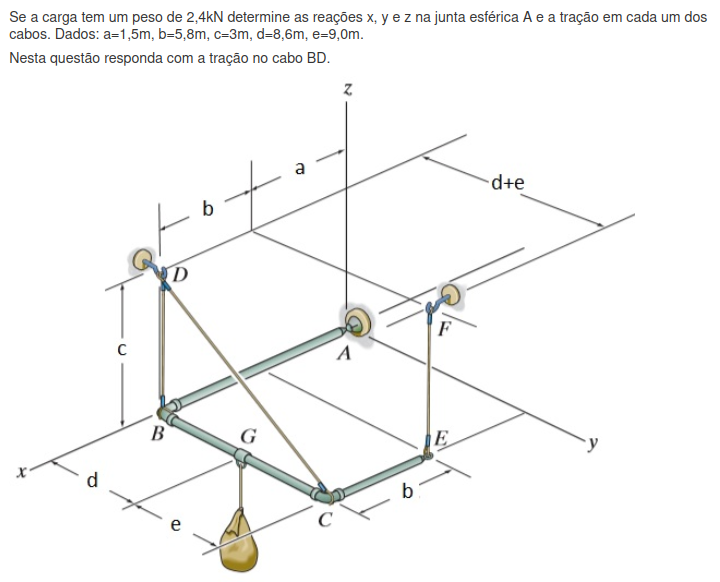

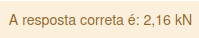

In [77]:
#Input data
a=1.5
b=5.
d=8.
e=9
P=2.4

In [78]:
#Prova Real
aplicacao=[
    [0,0,0], #RA
    [a+b,0,0], #Tbd
    [a+b,d+e,0], #Tcd
    [a,d+e,0],
    [a+b,d,0]]
aplicacao
Tbd,Tcd,Tef,RAx,RAy,RAz = sy.symbols('Tbd Tcd Tef RAx RAy RAz')
vTbd=Tbd*vector(0,0,1)
vTef=Tef*vector(0,0,1)
vTcd=Tcd*1/(sy.sqrt((d+e)**2+c**2))*vector(-d-e,c,0)
vP  =P*vector(0,0,-1)
vRA=vector(RAx,RAy,RAz)

Forcas=[vRA,vTbd,vTcd,vTef,vP]
icognitas=[RAx,RAy,RAz,Tbd,Tcd,Tef]
res=solveForces(Forcas,aplicacao,icognitas)[3]
resposta(res,'kN')

{RAx: 0.0, RAy: 0.0, Tcd: 0.0, RAz: -0.868778280542986, Tbd: 2.13936651583710, Tef: 1.12941176470588}
A resposta final é:


2.14kN

## 3.10)

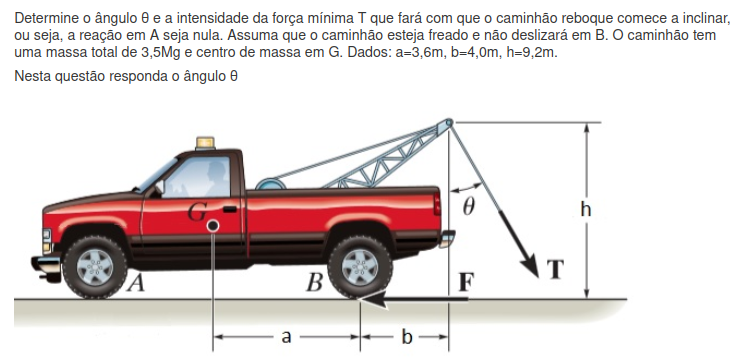

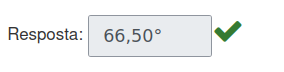

In [79]:
#input data
a=3.6
b=4.0
h=9.2
m=3.5

In [80]:
P=m*9.8
theta=sy.atan(h/b)
T=P*a/(sy.cos(theta)*b+sy.sin(theta)*h)
resposta(theta,'^{\circ}')

A resposta final é:


66.50^{\circ}

# 4.1)

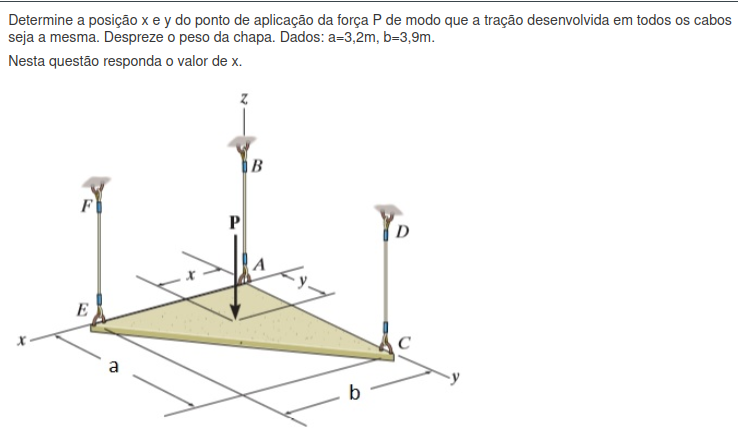

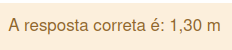

In [81]:
#Input data
a=3.2
b=3.9

In [82]:
x=b/3
resposta(x,'m')

A resposta final é:


1.30m

# 4.2)

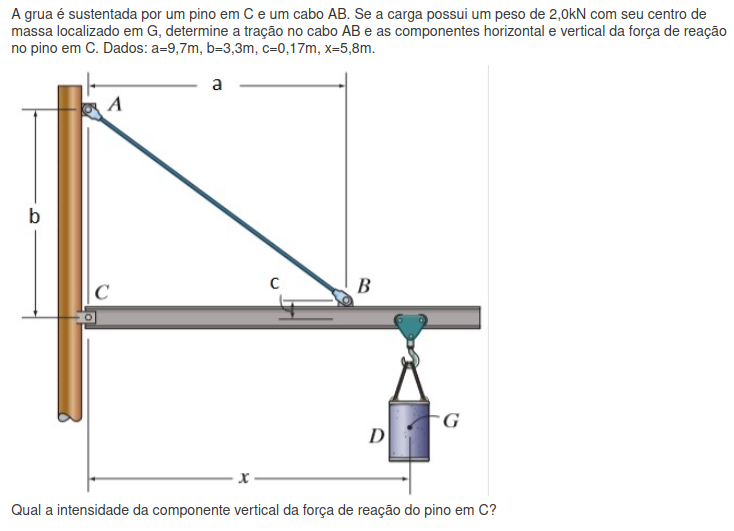

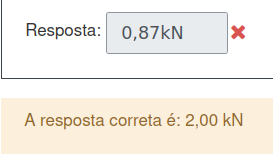


In [83]:
#input
a=9.7
b=3.3
c=0.17
x=5.8
P=2.0

In [84]:
'''
# referencia
P=9.81*2
x=5
b=3.2
c=0.2
a=4
'''

'\n# referencia\nP=9.81*2\nx=5\nb=3.2\nc=0.2\na=4\n'

In [85]:
H=(a**2+(b-c)**2)**0.5
T=P*x*H/(b*a)
RCx=T*a/H
RCy=P*(1-x*(b-c)/(b*a))
resposta(RCy,'kN')

A resposta final é:


0.87kN

# 4.3)

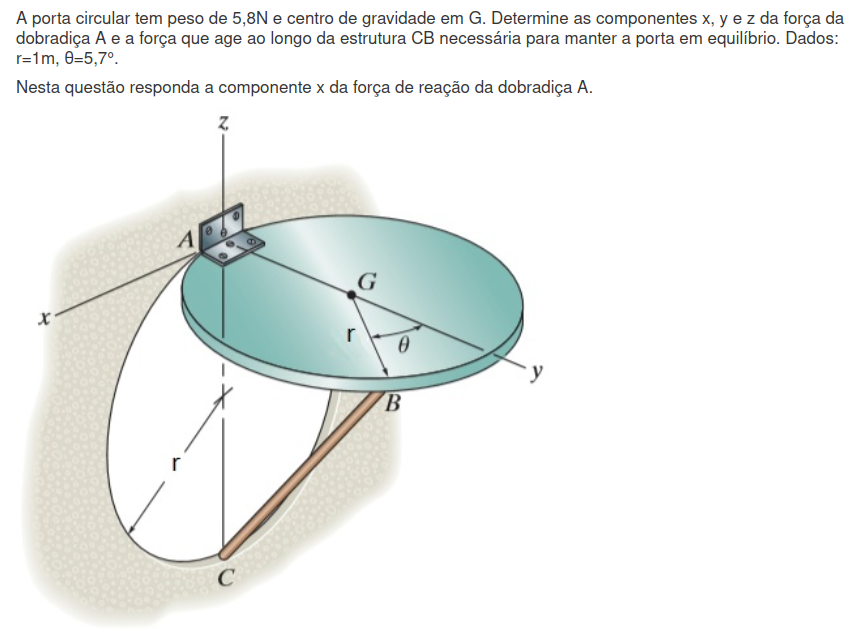

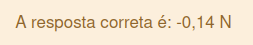

In [86]:
#input data
P=5.8
r=1
thetad=5.7

In [87]:
'''
#referencia
P=55
r=3
thetad=45
'''

'\n#referencia\nP=55\nr=3\nthetad=45\n'

In [88]:
theta=np.deg2rad(thetad)
Rx=-P*sy.sin(theta)/(2*(1+sy.cos(theta)))
Rz=-P*(1-1/(1+sy.cos(theta)))
Ry=-P/2
resposta(Rx,'N')

A resposta final é:


-0.14N

In [89]:
print(Rx)
print(Ry)
print(Rz)

-0.144370552175723
-2.9
-2.89281280816016


In [90]:
#input data


# 4.4 )

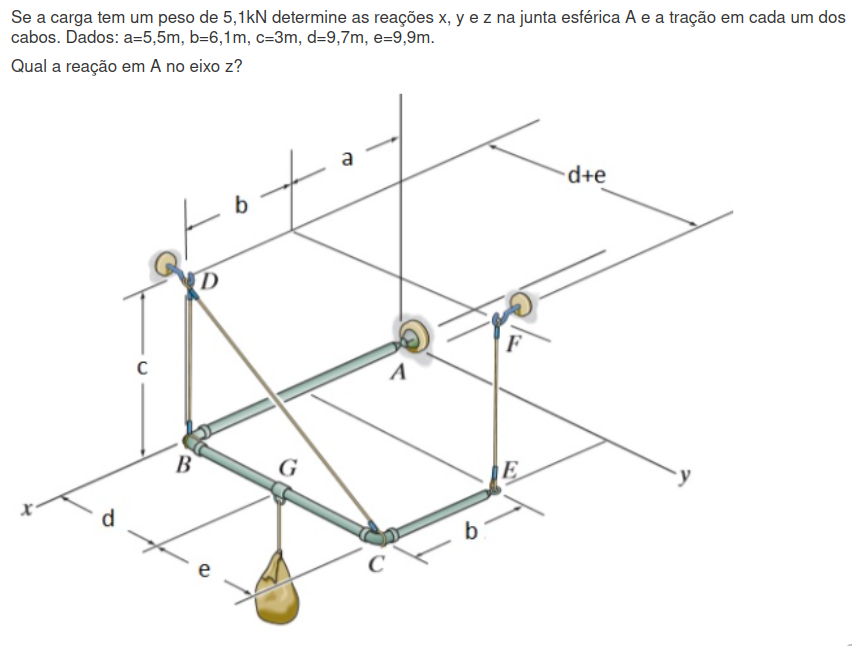

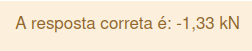

In [91]:
#Input data
a=5.5
b=6.1
c=3
d=9.7
e=9.9
P=5.1

In [92]:
'''
#exercicio resolvido
a=1.5
b=5.
d=8.
e=9
P=2.4
'''

'\n#exercicio resolvido\na=1.5\nb=5.\nd=8.\ne=9\nP=2.4\n'

In [93]:
#referencia
a=2.0
b=2.0
c=3.0
d=2.0
e=2.0
P=200.0

In [94]:
#resolucao
Fcd=0
FRax=0
FRay=0
Fef=P*d/(d+e)
Fbd=(P*(a+b)-Fef*a)/(a+b)
FRaz=P-Fbd-Fef
resposta(FRaz,'kN')

A resposta final é:


-50.00kN

In [95]:
print(Fef)
print(Fbd)
print(FRaz)

100.0
150.0
-50.0


In [96]:
#Prova Real
aplicacao=[
    [0,0,0], #RA
    [a+b,0,0], #Tbd
    [a+b,d+e,0], #Tcd
    [a,d+e,0],
    [a+b,d,0]]
aplicacao
Tbd,Tcd,Tef,RAx,RAy,RAz = sy.symbols('Tbd Tcd Tef RAx RAy RAz')
vTbd=Tbd*vector(0,0,1)
vTef=Tef*vector(0,0,1)
vTcd=Tcd*1/(sy.sqrt((d+e)**2+c**2))*vector(-d-e,c,0)
vP  =P*vector(0,0,-1)
vRA=vector(RAx,RAy,RAz)

Forcas=[vRA,vTbd,vTcd,vTef,vP]
icognitas=[RAx,RAy,RAz,Tbd,Tcd,Tef]
res=solveForces(Forcas,aplicacao,icognitas)[2]
print(res)
resposta(res,'kN')

{RAx: 0.0, RAy: 0.0, Tcd: 0.0, RAz: -50.0000000000000, Tbd: 150.000000000000, Tef: 100.000000000000}
-50.0000000000000
A resposta final é:


-50.00kN

# 4.5)

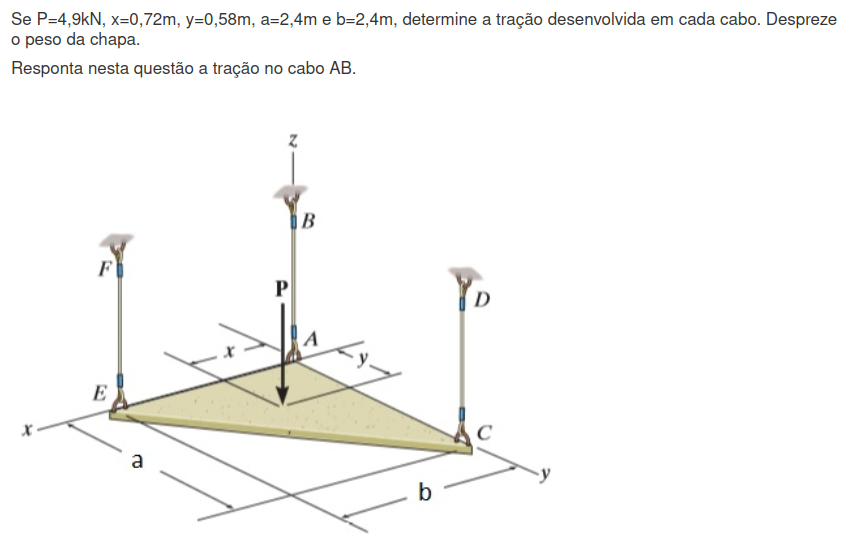

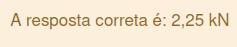

In [97]:
#input data
P=4.9
x=0.72
y=0.58
a=2.4
b=2.4

In [213]:
'''
#referencia
P=6
x=0.75
y=1
a=2
b=2
'''

'\n#referencia\nP=6\nx=0.75\ny=1\na=2\nb=2\n'

In [214]:
FCD=P*y/a
FEF=P*x/b
FAB=P*(1-y/a-x/b)
resposta(FAB,'kN')

A resposta final é:


0.75kN

In [215]:
'''
#input data
P=5.6
x=0.14
y=0.51
a=8.1
b=7.3
'''

'\n#input data\nP=5.6\nx=0.14\ny=0.51\na=8.1\nb=7.3\n'

In [216]:
#Prova Real
F,B,D = sy.symbols('F B D')
#a,b,theta, r, F1, F2, F3 = sy.symbols(r'a b \theta r F_1 F_2 F_3')
aplicacao=[
    [b,0,0],
    [0,0,0],
    [0,a,0],
    [x,y,0]]
vF  =F*vector(0,0,1)
vB  =B*vector(0,0,1)
vD  =D*vector(0,0,1)
vP  =P*vector(0,0,-1)

Forcas=[vF,vB,vD,vP]
icognitas=[F,B,D]
res=solveForces(Forcas,aplicacao,icognitas)[-2]
resposta(res,'kN')

{F: 2.25000000000000, B: 0.750000000000000, D: 3.00000000000000}
A resposta final é:


0.75kN

# 4.6)

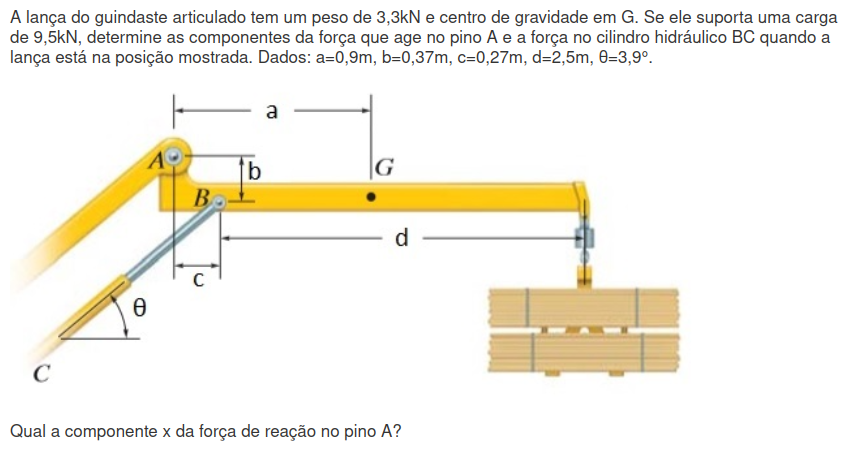

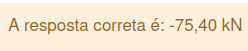

In [217]:
# input data
modPL=3.3
modPC=9.5
a=0.9
b=0.37
c=0.27
d=2.5
thetad=3.9

In [218]:
'''
#referencia
modPL=125
modPC=600
a=4
b=1
d=8
c=1
thetad=40
'''

'\n#referencia\nmodPL=125\nmodPC=600\na=4\nb=1\nd=8\nc=1\nthetad=40\n'

In [219]:
'''
#input data
modPL=9.1
modPC=5.9
a=1.6
b=0.36
c=0.3
d=2.3
thetad=7.9
'''

'\n#input data\nmodPL=9.1\nmodPC=5.9\na=1.6\nb=0.36\nc=0.3\nd=2.3\nthetad=7.9\n'

In [220]:
theta=np.deg2rad(thetad)
RAy=(-modPL*(a-c)-modPC*d+b/sy.tan(theta)*(modPL+modPC))/(c+b/sy.tan(theta))
RAx=(RAy-modPL-modPC)/sy.tan(theta)
modT=-RAx/sy.cos(theta)
resposta(RAx,'kN')

A resposta final é:


-75.40kN

In [221]:
#prova real
#a,b,c,d,modPL,modPC,theta=sy.symbols(r'a b c d P_L P_C \theta')
modRAy,modRAx,modT=sy.symbols('RAy RAx T')
PL=-j*modPL
PC=-j*modPC
RAx=modRAx*i
RAy=modRAy*j
T=modT*(i*sy.cos(theta)+j*sy.sin(theta))
Forcas=[PL,PC,RAx,RAy,T]
aplicacao=[[a-c,0,0],[d,0,0],[-c,b,0],[-c,b,0],[0,0,0]]
icognitas=[modRAy,modRAx,modT]
solveForces(Forcas,aplicacao,icognitas)

{RAy: 7.65989624645574, RAx: -75.3977621257920, T: 75.5727675831362}


[7.65989624645574, -75.3977621257920, 75.5727675831362]

# 4.7)

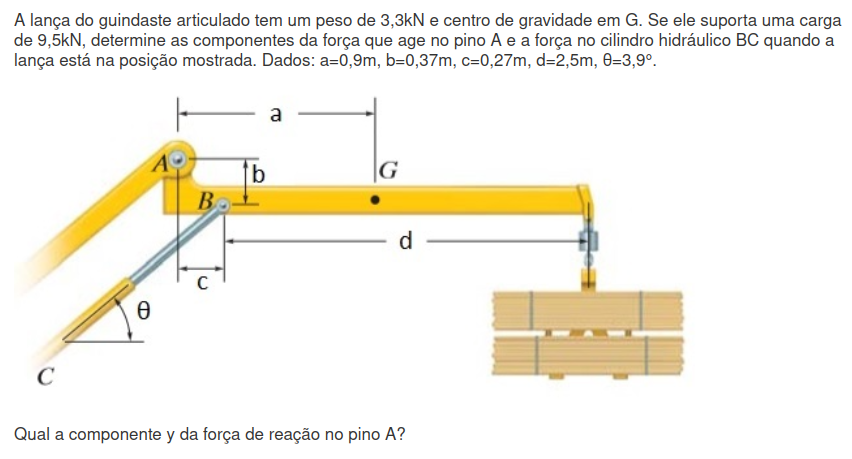

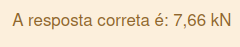

In [222]:
# input data
modPL=3.3
modPC=9.5
a=0.9
b=0.37
c=0.27
d=2.5
thetad=3.9

In [223]:
'''
#referencia
modPL=125
modPC=600
a=4
b=1
d=8
c=1
thetad=40
'''

'\n#referencia\nmodPL=125\nmodPC=600\na=4\nb=1\nd=8\nc=1\nthetad=40\n'

In [224]:
'''
#input data
modPL=9.1
modPC=5.9
a=1.6
b=0.36
c=0.3
d=2.3
thetad=7.9
'''

'\n#input data\nmodPL=9.1\nmodPC=5.9\na=1.6\nb=0.36\nc=0.3\nd=2.3\nthetad=7.9\n'

In [225]:
theta=np.deg2rad(thetad)
RAy=(-modPL*(a-c)-modPC*d+b/sy.tan(theta)*(modPL+modPC))/(c+b/sy.tan(theta))
RAx=(RAy-modPL-modPC)/sy.tan(theta)
modT=-RAx/sy.cos(theta)
resposta(RAy,'kN')

A resposta final é:


7.66kN

In [226]:
#prova real
#a,b,c,d,modPL,modPC,theta=sy.symbols(r'a b c d P_L P_C \theta')
modRAy,modRAx,modT=sy.symbols('RAy RAx T')
PL=-j*modPL
PC=-j*modPC
RAx=modRAx*i
RAy=modRAy*j
T=modT*(i*sy.cos(theta)+j*sy.sin(theta))
Forcas=[PL,PC,RAx,RAy,T]
aplicacao=[[a-c,0,0],[d,0,0],[-c,b,0],[-c,b,0],[0,0,0]]
icognitas=[modRAy,modRAx,modT]
solveForces(Forcas,aplicacao,icognitas)

{RAy: 7.65989624645574, RAx: -75.3977621257920, T: 75.5727675831362}


[7.65989624645574, -75.3977621257920, 75.5727675831362]

# 4.8)

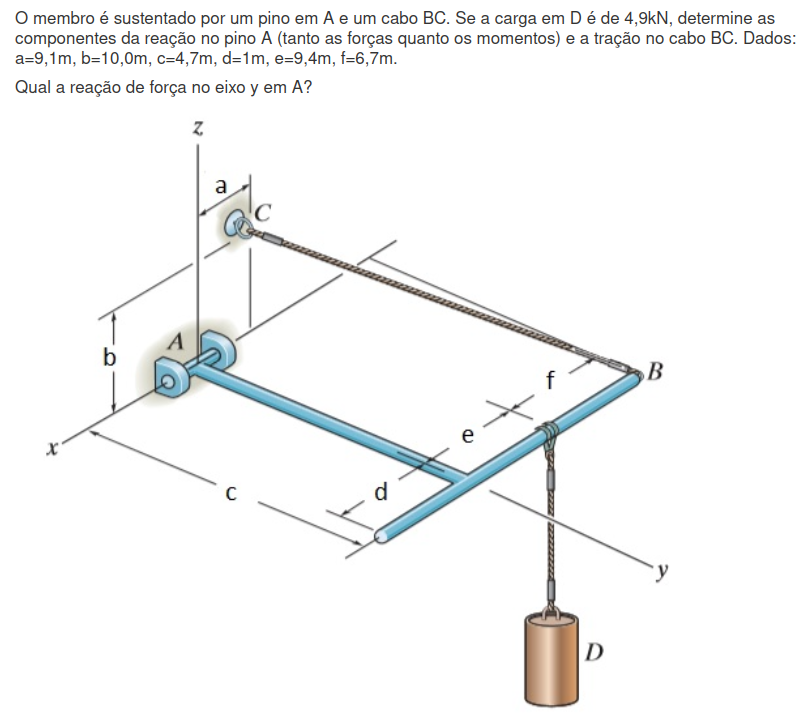

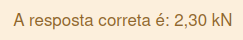

In [227]:
#INPUT DATA
a=9.1
b=10
c=4.7
d=1
e=9.4
f=6.7
P=4.9


In [228]:
'''
#referencia
a=1.0
b=2.0
c=6.0
d=2.
e=2.
f=2.
P=300.
'''

'\n#referencia\na=1.0\nb=2.0\nc=6.0\nd=2.\ne=2.\nf=2.\nP=300.\n'

In [229]:
DX=abs(a-f-e)
DY=c
DZ=b
L=sy.sqrt(DX**2+DY**2+DZ**2)
FCB=P*L/DZ
FCBx=FCB*DX/L
FRAx=-FCBx
FCBy=FCB*DY/L
FRAy=FCBy
#MAz=FBCx*c-FBCy*(f+e)
resposta(FRAy,'kN')
FCB

A resposta final é:


2.30kN

6.40926743083794

In [230]:
'''
#INPUT DATA
a=8.8
b=3.3
c=4.9
d=1
e=2.1
f=3.9
P=7.4
'''

'\n#INPUT DATA\na=8.8\nb=3.3\nc=4.9\nd=1\ne=2.1\nf=3.9\nP=7.4\n'

In [231]:
DX=a-(f+e)
DY=c
DZ=b
H=(DX**2+DY**2+DZ**2)**0.5
#Prova Real
aplicacao=[
    [0,0,0],
    [-e,c,0],
    [-e-f,c,0]]
aplicacao
RAx,RAy,RAz,MAy,MAz,T = sy.symbols('RAx RAy RAz MAy MAz T')

vRA =    vector(RAx,RAy,RAz)
vP  =P  *vector(0,0,-1)
vT  =T  *vector(DX/H,DY/H,DZ/H)
Forcas=[vRA,vP,vT]
#print(Forcas)

#print(icognitas)
n=len(Forcas)
vetorAplicacao=[]
for ff in range(n):
    vetorAplicacao.append(vector(*aplicacao[ff]))

#Somatorio das forcas
dir=[i,j,k]
somaF=[0,0,0]
for ff in range(n):
    for d in range(3):
        somaF[d]+=Forcas[ff].dot(dir[d])
#Somatorio dos momentos


somaM=[0,MAy,MAz]
for ff in range(n):
    for d in range(3):
        somaM[d]+=(vetorAplicacao[ff].cross(Forcas[ff])).dot(dir[d])
#Resolver equacoes
equacoes=somaF+somaM
equacoes = [i for i in equacoes if i != 0] #eliminar zeros
print(equacoes)
icognitas=[RAx,RAy,RAz,T,MAy,MAz]
result=sy.solve(equacoes,*icognitas)
#print(result)
res=[]
for icog in range(len(icognitas)):
    res.append(result[icognitas[icog]])
resposta(-res[1],'kN')

[RAx - 0.535162565302969*T, RAy + 0.359323436703422*T, RAz + 0.764517950432812*T - 4.9, 3.59323436703422*T - 23.03, MAy + 12.3087390019683*T - 46.06, MAz - 3.26984327400114*T]
A resposta final é:


2.30kN

# 4.9)

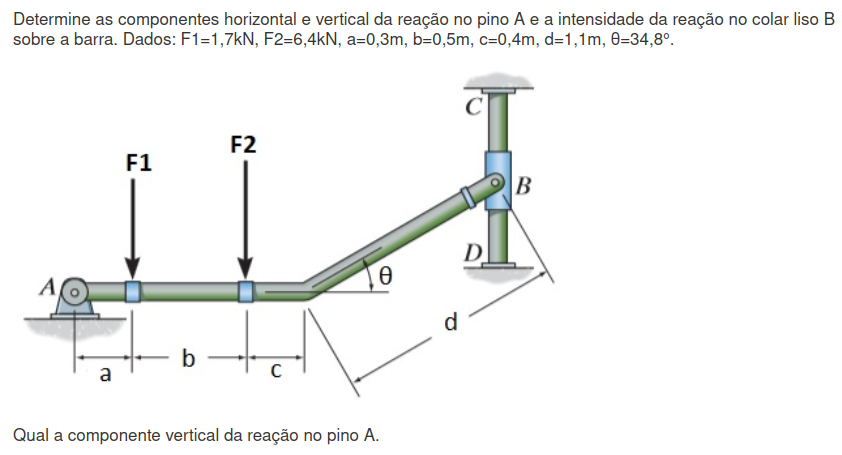

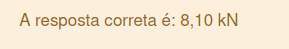

In [232]:
#INput data
a=0.3
b=0.5
c=0.4
d=1.1
thetad=34.8
F1
F2=6.4

In [233]:
'''
#referencia
a=1
b=2
c=1
F1=300
F2=450
thetad=30
'''

'\n#referencia\na=1\nb=2\nc=1\nF1=300\nF2=450\nthetad=30\n'

In [234]:
#Prova Real
theta=np.deg2rad(thetad)
RAx,RAy,RBx = sy.symbols('RAx RAy RBx')
#a,b,theta, r, F1, F2, F3 = sy.symbols(r'a b \theta r F_1 F_2 F_3')
aplicacao=[
    [0,0,0],
    [a,0,0],
    [a+b,0,0],
    [a+b+c+d*sy.cos(theta),d*sy.sin(theta),0]]
vRA  =vector(RAx,RAy,0)
vF1  =F1*vector(0,-1,0)
vF2  =F2*vector(0,-1,0)
vRB  =vector(RBx,0,0)

Forcas=[vRA,vF1,vF2,vRB]
icognitas=[RAx,RAy,RBx]
res=solveForces(Forcas,aplicacao,icognitas,True)[1]
resposta(abs(res),'kN')

{RAx: 8.96803950000335, RBx: -8.96803950000335, RAy: 8.10000000000000}
Forcas
[RAx*N.i + RAy*N.j, (-1.7)*N.j, (-6.4)*N.j, RBx*N.i]
Equacoes
[RAx + RBx, RAy - 8.1, -0.627784924452875*RBx - 5.63]
A resposta final é:


8.10kN

# 4.10)

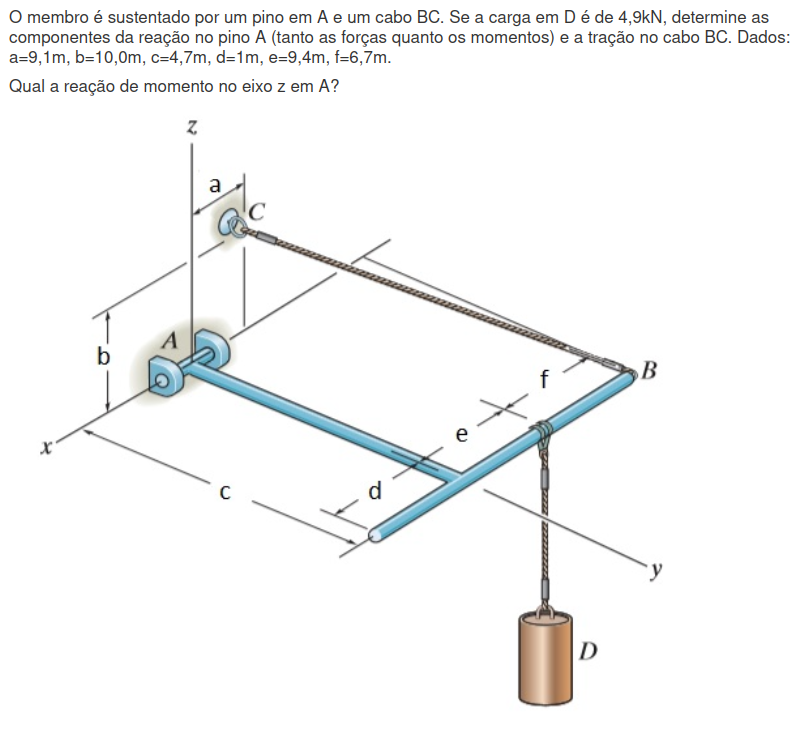

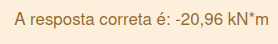

In [235]:
#INPUT DATA
a=9.1
b=10
c=4.7
d=1
e=9.4
f=6.7
P=4.9

In [236]:
'''
#referencia
a=1.0
b=2.0
c=6.0
d=2.
e=2.
f=2.
P=300.
'''

'\n#referencia\na=1.0\nb=2.0\nc=6.0\nd=2.\ne=2.\nf=2.\nP=300.\n'

In [237]:
DX=abs(a-f-e)
DY=c
DZ=b
L=sy.sqrt(DX**2+DY**2+DZ**2)
FCB=P*L/DZ
FCBx=FCB*DX/L
FRAx=-FCBx
FCBy=FCB*DY/L
FRAy=FCBy
FCBx=FCB*DX/L
MAz=FCBx*c-FCBy*(f+e)
resposta(MAz,'kN*m')
FCB

A resposta final é:


-20.96kN*m

6.40926743083794

In [238]:
FCBx*c

16.1210000000000

In [239]:
FCBy*(f+e)

37.0783000000000

In [240]:
'''
#INPUT DATA
a=8.8
b=3.3
c=4.9
d=1
e=2.1
f=3.9
P=7.4
'''

'\n#INPUT DATA\na=8.8\nb=3.3\nc=4.9\nd=1\ne=2.1\nf=3.9\nP=7.4\n'

In [241]:
DX=a-(f+e)
DY=c
DZ=b
H=(DX**2+DY**2+DZ**2)**0.5
#Prova Real
aplicacao=[
    [0,0,0],
    [-e,c,0],
    [-e-f,c,0]]
aplicacao
RAx,RAy,RAz,MAy,MAz,T = sy.symbols('RAx RAy RAz MAy MAz T')

vRA =    vector(RAx,RAy,RAz)
vP  =P  *vector(0,0,-1)
vT  =T  *vector(DX/H,DY/H,DZ/H)
Forcas=[vRA,vP,vT]
#print(Forcas)

#print(icognitas)
n=len(Forcas)
vetorAplicacao=[]
for ff in range(n):
    vetorAplicacao.append(vector(*aplicacao[ff]))

#Somatorio das forcas
dir=[i,j,k]
somaF=[0,0,0]
for ff in range(n):
    for d in range(3):
        somaF[d]+=Forcas[ff].dot(dir[d])
#Somatorio dos momentos


somaM=[0,MAy,MAz]
for ff in range(n):
    for d in range(3):
        somaM[d]+=(vetorAplicacao[ff].cross(Forcas[ff])).dot(dir[d])
#Resolver equacoes
equacoes=somaF+somaM
equacoes = [i for i in equacoes if i != 0] #eliminar zeros
print(equacoes)
icognitas=[RAx,RAy,RAz,T,MAy,MAz]
result=sy.solve(equacoes,*icognitas)
#print(result)
res=[]
for icog in range(len(icognitas)):
    res.append(result[icognitas[icog]])
resposta(-res[-1],'kN*m')

[RAx - 0.535162565302969*T, RAy + 0.359323436703422*T, RAz + 0.764517950432812*T - 4.9, 3.59323436703422*T - 23.03, MAy + 12.3087390019683*T - 46.06, MAz - 3.26984327400114*T]
A resposta final é:


-20.96kN*m

# 5.1)

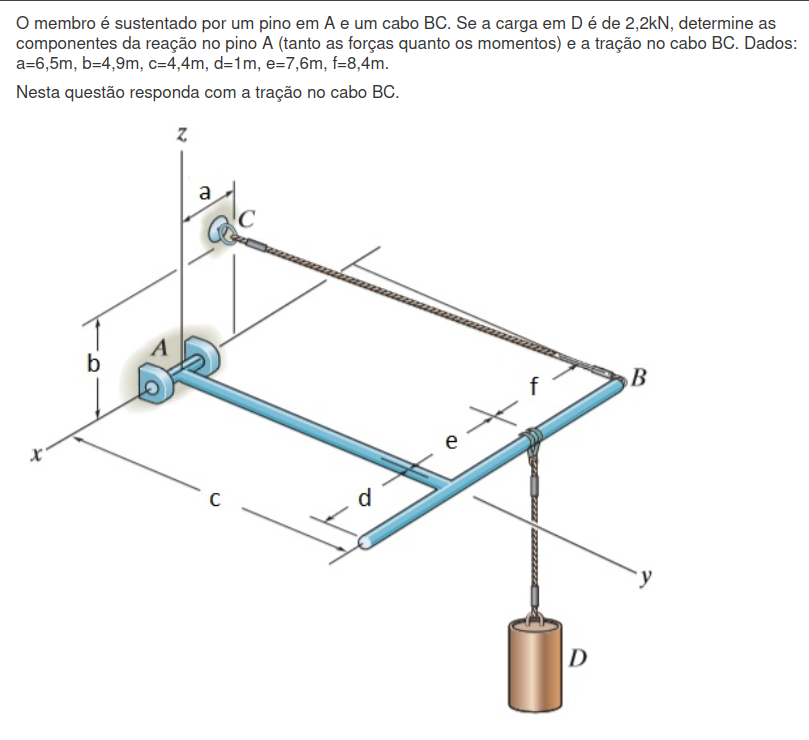

In [354]:
#INPUT DATA
a=6.5
b=4.9
c=4.4
d=1
e=7.6
f=8.4
P=2.2

In [355]:
'''
#referencia
a=1.0
b=2.0
c=6.0
d=2.
e=2.
f=2.
P=300.
'''

'\n#referencia\na=1.0\nb=2.0\nc=6.0\nd=2.\ne=2.\nf=2.\nP=300.\n'

In [356]:
DX=abs(a-f-e)
DY=c
DZ=b
L=sy.sqrt(DX**2+DY**2+DZ**2)
FCB=P*L/DZ
FCBx=FCB*DX/L
FRAx=-FCBx
FCBy=FCB*DY/L
FRAy=FCBy
FCBx=FCB*DX/L
MAz=FCBx*c-FCBy*(f+e)
resposta(FCB,'kN')

A resposta final é:


5.19kN

In [357]:
FCBx*c

18.7673469387755

In [358]:
FCBy*(f+e)

31.6081632653061

In [359]:
'''
#INPUT DATA
a=8.8
b=3.3
c=4.9
d=1
e=2.1
f=3.9
P=7.4
'''

'\n#INPUT DATA\na=8.8\nb=3.3\nc=4.9\nd=1\ne=2.1\nf=3.9\nP=7.4\n'

In [360]:
DX=a-(f+e)
DY=c
DZ=b
H=(DX**2+DY**2+DZ**2)**0.5
#Prova Real
aplicacao=[
    [0,0,0],
    [-e,c,0],
    [-e-f,c,0]]
aplicacao
RAx,RAy,RAz,MAy,MAz,T = sy.symbols('RAx RAy RAz MAy MAz T')

vRA =    vector(RAx,RAy,RAz)
vP  =P  *vector(0,0,-1)
vT  =T  *vector(DX/H,DY/H,DZ/H)
Forcas=[vRA,vP,vT]
#print(Forcas)

#print(icognitas)
n=len(Forcas)
vetorAplicacao=[]
for ff in range(n):
    vetorAplicacao.append(vector(*aplicacao[ff]))

#Somatorio das forcas
dir=[i,j,k]
somaF=[0,0,0]
for ff in range(n):
    for d in range(3):
        somaF[d]+=Forcas[ff].dot(dir[d])
#Somatorio dos momentos


somaM=[0,MAy,MAz]
for ff in range(n):
    for d in range(3):
        somaM[d]+=(vetorAplicacao[ff].cross(Forcas[ff])).dot(dir[d])
#Resolver equacoes
equacoes=somaF+somaM
equacoes = [i for i in equacoes if i != 0] #eliminar zeros
print(equacoes)
icognitas=[RAx,RAy,RAz,T,MAy,MAz]
result=sy.solve(equacoes,*icognitas)
#print(result)
res=[]
for icog in range(len(icognitas)):
    res.append(result[icognitas[icog]])
resposta(res[-3],'kN')

[RAx - 0.821841128742096*T, RAy + 0.380642206996339*T, RAz + 0.423897003245923*T - 2.2, 1.86514681428206*T - 9.68, MAy + 6.78235205193477*T - 16.72, MAz - 2.4741743454762*T]
A resposta final é:


5.19kN

# 5.2)

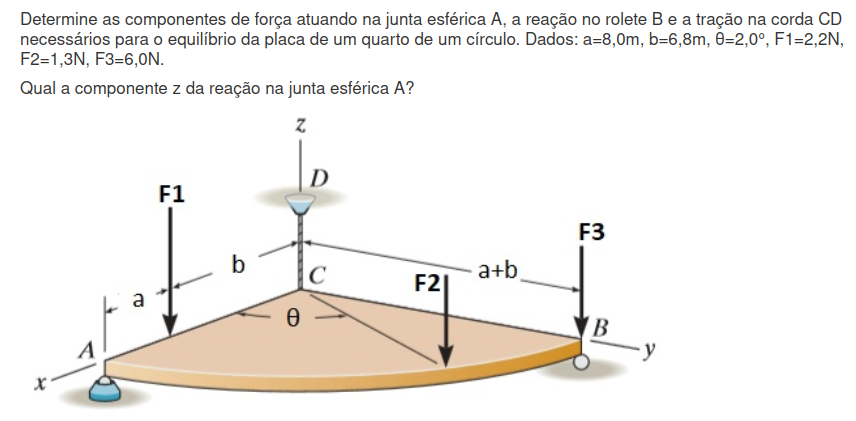

In [361]:
#input data
a=8
b=6.8
thetad=2
F1=2.2
F2=1.3
F3=6

In [362]:
'''
#referencia
a=1
b=2
thetad=60
F1=350
F2=200
F3=200
'''

'\n#referencia\na=1\nb=2\nthetad=60\nF1=350\nF2=200\nF3=200\n'

In [363]:
#Prova Real
r=a+b
theta=np.deg2rad(thetad)
T,RA,RB = sy.symbols('T RA RB')
#a,b,theta, r, F1, F2, F3 = sy.symbols(r'a b \theta r F_1 F_2 F_3')
aplicacao=[
    [0,0,0],
    [b,0,0],
    [r*sy.cos(theta),r*sy.sin(theta),0],
    [0,r,0],
    [r,0,0],
    [0,r,0]]
vT   =T *vector(0,0,1)
vF1  =F1*vector(0,0,-1)
vF2  =F2*vector(0,0,-1)
vF3  =F3*vector(0,0,-1)
vRA  =RA*vector(0,0,1)
vRB  =RB*vector(0,0,1)

Forcas=[vT,vF1,vF2,vF3,vRA,vRB]
icognitas=[RA,RB,T]
RA=solveForces(Forcas,aplicacao,icognitas)[0]
resposta(RA,'N')

{RA: 2.31001888593563, RB: 6.04536934571325, T: 1.14461176835111}
A resposta final é:


2.31N

# 5.3)

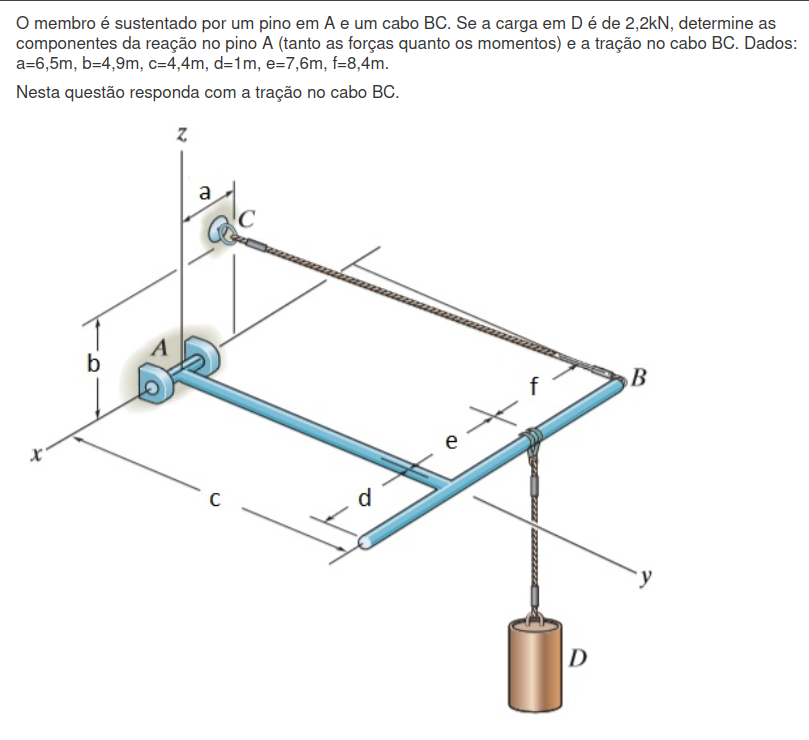

In [364]:
#INPUT DATA
a=6.5
b=4.9
c=4.4
d=1
e=7.6
f=8.4
P=2.2

In [365]:
'''
#referencia
a=1.0
b=2.0
c=6.0
d=2.
e=2.
f=2.
P=300.
'''

'\n#referencia\na=1.0\nb=2.0\nc=6.0\nd=2.\ne=2.\nf=2.\nP=300.\n'

In [366]:
DX=abs(a-f-e)
DY=c
DZ=b
L=sy.sqrt(DX**2+DY**2+DZ**2)
FCB=P*L/DZ
FCBx=FCB*DX/L
FRAx=-FCBx
FCBy=FCB*DY/L
FRAy=FCBy
FCBx=FCB*DX/L
FRAz=0
MAz=FCBx*c-FCBy*(f+e)
resposta(FRAz,'kN')

A resposta final é:


0.00kN

In [367]:
FCBx*c

18.7673469387755

In [368]:
FCBy*(f+e)

31.6081632653061

In [369]:
'''
#INPUT DATA
a=8.8
b=3.3
c=4.9
d=1
e=2.1
f=3.9
P=7.4
'''

'\n#INPUT DATA\na=8.8\nb=3.3\nc=4.9\nd=1\ne=2.1\nf=3.9\nP=7.4\n'

In [370]:
DX=a-(f+e)
DY=c
DZ=b
H=(DX**2+DY**2+DZ**2)**0.5
#Prova Real
aplicacao=[
    [0,0,0],
    [-e,c,0],
    [-e-f,c,0]]
aplicacao
RAx,RAy,RAz,MAy,MAz,T = sy.symbols('RAx RAy RAz MAy MAz T')

vRA =    vector(RAx,RAy,RAz)
vP  =P  *vector(0,0,-1)
vT  =T  *vector(DX/H,DY/H,DZ/H)
Forcas=[vRA,vP,vT]
#print(Forcas)

#print(icognitas)
n=len(Forcas)
vetorAplicacao=[]
for ff in range(n):
    vetorAplicacao.append(vector(*aplicacao[ff]))

#Somatorio das forcas
dir=[i,j,k]
somaF=[0,0,0]
for ff in range(n):
    for d in range(3):
        somaF[d]+=Forcas[ff].dot(dir[d])
#Somatorio dos momentos


somaM=[0,MAy,MAz]
for ff in range(n):
    for d in range(3):
        somaM[d]+=(vetorAplicacao[ff].cross(Forcas[ff])).dot(dir[d])
#Resolver equacoes
equacoes=somaF+somaM
equacoes = [i for i in equacoes if i != 0] #eliminar zeros
print(equacoes)
icognitas=[RAx,RAy,RAz,T,MAy,MAz]
result=sy.solve(equacoes,*icognitas)
#print(result)
res=[]
for icog in range(len(icognitas)):
    res.append(result[icognitas[icog]])
resposta(res[2],'kN')

[RAx - 0.821841128742096*T, RAy + 0.380642206996339*T, RAz + 0.423897003245923*T - 2.2, 1.86514681428206*T - 9.68, MAy + 6.78235205193477*T - 16.72, MAz - 2.4741743454762*T]
A resposta final é:


-0.00kN

# 5.4)

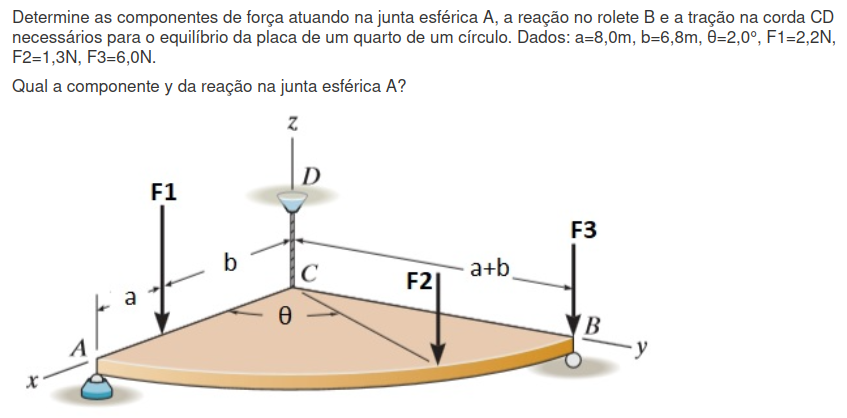

In [371]:
#input data
a=8
b=6.8
thetad=2
F1=2.2
F2=1.3
F3=6

In [372]:
'''
#referencia
a=1
b=2
thetad=60
F1=350
F2=200
F3=200
'''

'\n#referencia\na=1\nb=2\nthetad=60\nF1=350\nF2=200\nF3=200\n'

In [373]:
resposta(0,'N')

A resposta final é:


0.00N

# 5.5)

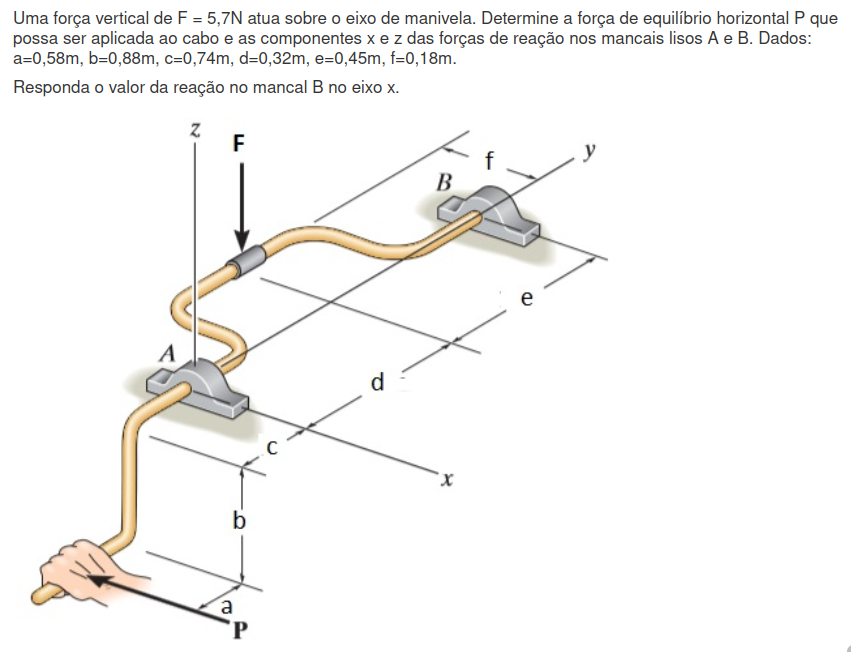

In [374]:
# INPUT DATA
modF=5.7
a=0.58
b=0.88
c=0.74
d=0.32
e=0.45
f=0.18

In [375]:
'''
#referencia
a=4
b=8
c=6
d=14
e=14
f=10
modF=80
'''

'\n#referencia\na=4\nb=8\nc=6\nd=14\ne=14\nf=10\nmodF=80\n'

In [378]:
modP=modF*f/b
modRAx=modP*(d+e+a+c)/(d+e)
modRBx=modP-modRAx
resposta(modRBx,'N')

A resposta final é:


-2.00N

In [379]:
print(modP)
print(modRAx)
print(modRBx)

1.165909090909091
3.1646103896103894
-1.9987012987012984


# 5.6)

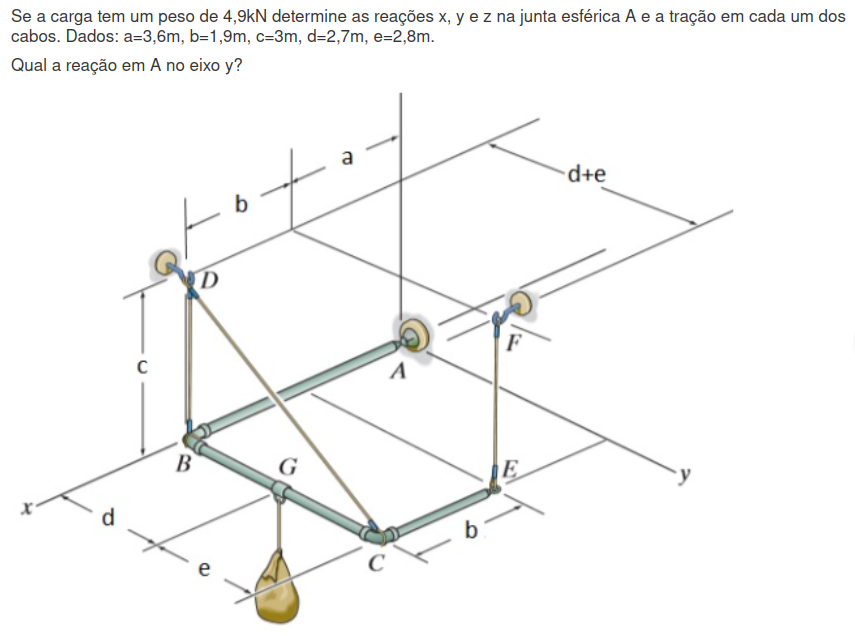

In [380]:
#Input data
a=3.6
b=1.9
c=3
d=2.7
e=2.8
P=4.9

In [381]:
'''
#exercicio resolvido
a=1.5
b=5.
d=8.
e=9
P=2.4
'''

'\n#exercicio resolvido\na=1.5\nb=5.\nd=8.\ne=9\nP=2.4\n'

In [382]:
#referencia
a=2.0
b=2.0
c=3.0
d=2.0
e=2.0
P=200.0

In [383]:
#resolucao
Fcd=0
FRax=0
FRay=0
Fef=P*d/(d+e)
Fbd=(P*(a+b)-Fef*a)/(a+b)
FRaz=P-Fbd-Fef
resposta(FRay,'kN')

A resposta final é:


0.00kN

In [384]:
print(Fef)
print(Fbd)
print(FRaz)

100.0
150.0
-50.0


In [385]:
#Prova Real
aplicacao=[
    [0,0,0], #RA
    [a+b,0,0], #Tbd
    [a+b,d+e,0], #Tcd
    [a,d+e,0],
    [a+b,d,0]]
aplicacao
Tbd,Tcd,Tef,RAx,RAy,RAz = sy.symbols('Tbd Tcd Tef RAx RAy RAz')
vTbd=Tbd*vector(0,0,1)
vTef=Tef*vector(0,0,1)
vTcd=Tcd*1/(sy.sqrt((d+e)**2+c**2))*vector(-d-e,c,0)
vP  =P*vector(0,0,-1)
vRA=vector(RAx,RAy,RAz)

Forcas=[vRA,vTbd,vTcd,vTef,vP]
icognitas=[RAx,RAy,RAz,Tbd,Tcd,Tef]
res=solveForces(Forcas,aplicacao,icognitas)[1]
print(res)
resposta(res,'kN')

{RAx: 0.0, RAy: 0.0, Tcd: 0.0, RAz: -50.0000000000000, Tbd: 150.000000000000, Tef: 100.000000000000}
0.0
A resposta final é:


0.00kN

# 5.7)

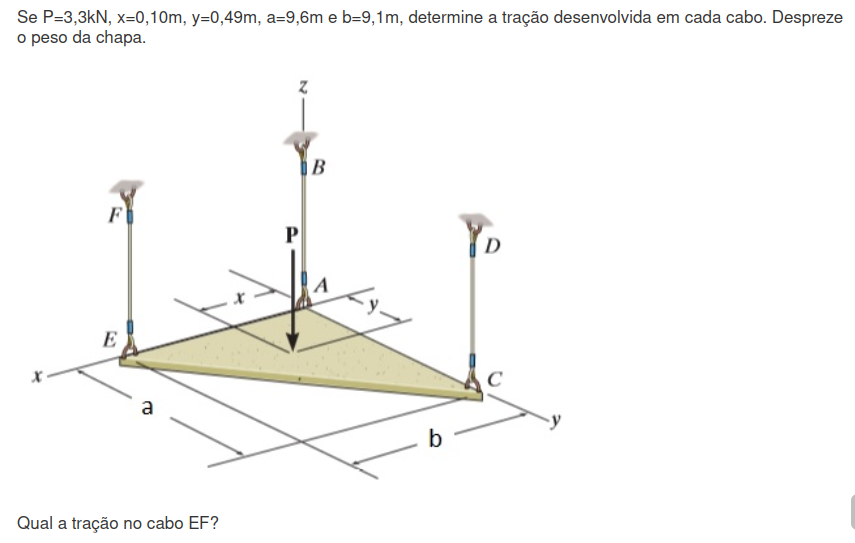

In [386]:
#input data
P=3.3
x=0.1
y=0.49
a=9.6
b=9.1

In [387]:
'''
#referencia
P=6
x=0.75
y=1
a=2
b=2
'''

'\n#referencia\nP=6\nx=0.75\ny=1\na=2\nb=2\n'

In [388]:
FCD=P*y/a
FEF=P*x/b
FAB=P*(1-y/a-x/b)
resposta(FEF,'kN')

A resposta final é:


0.04kN

In [389]:
#Prova Real
F,B,D = sy.symbols('F B D')
#a,b,theta, r, F1, F2, F3 = sy.symbols(r'a b \theta r F_1 F_2 F_3')
aplicacao=[
    [b,0,0],
    [0,0,0],
    [0,a,0],
    [x,y,0]]
vF  =F*vector(0,0,1)
vB  =B*vector(0,0,1)
vD  =D*vector(0,0,1)
vP  =P*vector(0,0,-1)

Forcas=[vF,vB,vD,vP]
icognitas=[F,B,D]
res=solveForces(Forcas,aplicacao,icognitas)[0]
resposta(res,'kN')

{F: 0.0362637362637363, B: 3.09529876373626, D: 0.168437500000000}
A resposta final é:


0.04kN

# 5.8)

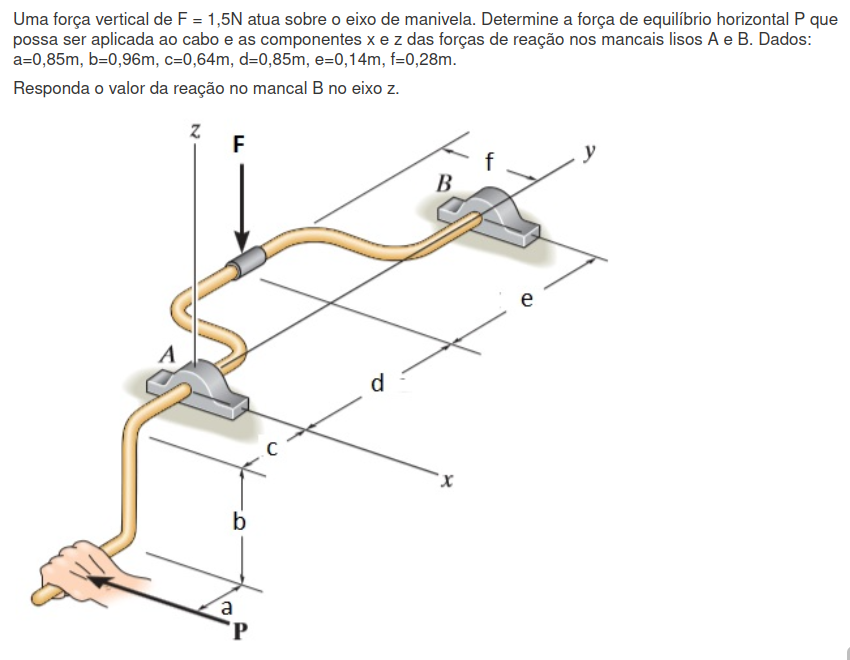

In [404]:
# INPUT DATA
modF=1.5
a=0.85
b=0.96
c=0.64
d=0.85
e=0.14
f=0.28

In [405]:
'''
#referencia
a=4
b=8
c=6
d=14
e=14
f=10
modF=80
'''

'\n#referencia\na=4\nb=8\nc=6\nd=14\ne=14\nf=10\nmodF=80\n'

In [406]:
modP=modF*f/b
modRAx=modP*(d+e+a+c)/(d+e)
modRBx=modP-modRAx
modRBz=modF*d/(d+e)
resposta(modRBz,'N')

A resposta final é:


1.29N

In [393]:
print(modP)
print(modRAx)
print(modRBx)
print(modRBz)

0.43750000000000006
1.0959595959595962
-0.6584595959595962
0.21212121212121215


# 5.9)

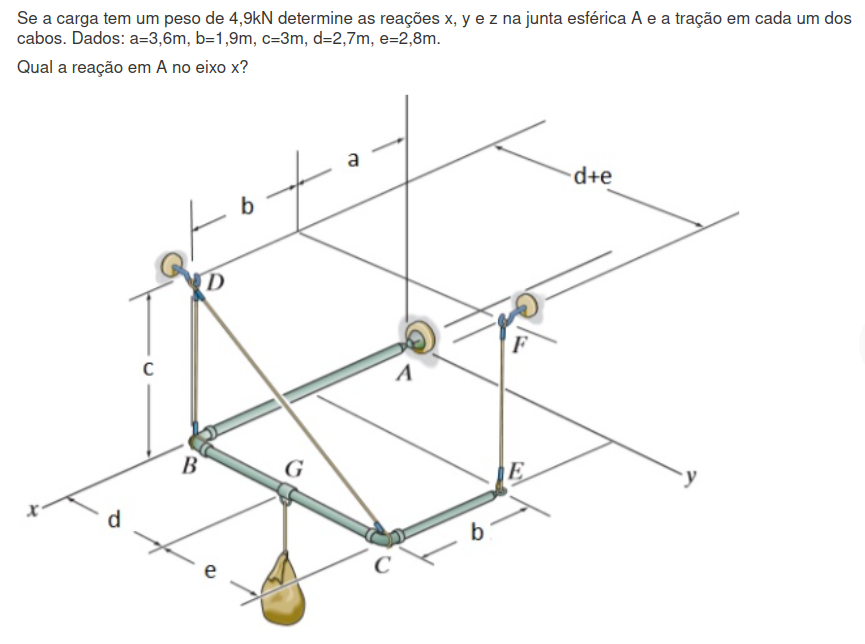

In [394]:
#Input data
a=3.6
b=1.9
c=3
d=2.7
e=2.8
P=4.9

In [395]:
'''
#exercicio resolvido
a=1.5
b=5.
d=8.
e=9
P=2.4
'''

'\n#exercicio resolvido\na=1.5\nb=5.\nd=8.\ne=9\nP=2.4\n'

In [396]:
#referencia
a=2.0
b=2.0
c=3.0
d=2.0
e=2.0
P=200.0

In [397]:
#resolucao
Fcd=0
FRax=0
FRay=0
Fef=P*d/(d+e)
Fbd=(P*(a+b)-Fef*a)/(a+b)
FRaz=P-Fbd-Fef
resposta(FRax,'kN')

A resposta final é:


0.00kN

In [398]:
print(Fef)
print(Fbd)
print(FRaz)

100.0
150.0
-50.0


In [399]:
#Prova Real
aplicacao=[
    [0,0,0], #RA
    [a+b,0,0], #Tbd
    [a+b,d+e,0], #Tcd
    [a,d+e,0],
    [a+b,d,0]]
aplicacao
Tbd,Tcd,Tef,RAx,RAy,RAz = sy.symbols('Tbd Tcd Tef RAx RAy RAz')
vTbd=Tbd*vector(0,0,1)
vTef=Tef*vector(0,0,1)
vTcd=Tcd*1/(sy.sqrt((d+e)**2+c**2))*vector(-d-e,c,0)
vP  =P*vector(0,0,-1)
vRA=vector(RAx,RAy,RAz)

Forcas=[vRA,vTbd,vTcd,vTef,vP]
icognitas=[RAx,RAy,RAz,Tbd,Tcd,Tef]
res=solveForces(Forcas,aplicacao,icognitas)[0]
print(res)
resposta(res,'kN')

{RAx: 0.0, RAy: 0.0, Tcd: 0.0, RAz: -50.0000000000000, Tbd: 150.000000000000, Tef: 100.000000000000}
0.0
A resposta final é:


0.00kN

# 5.10)

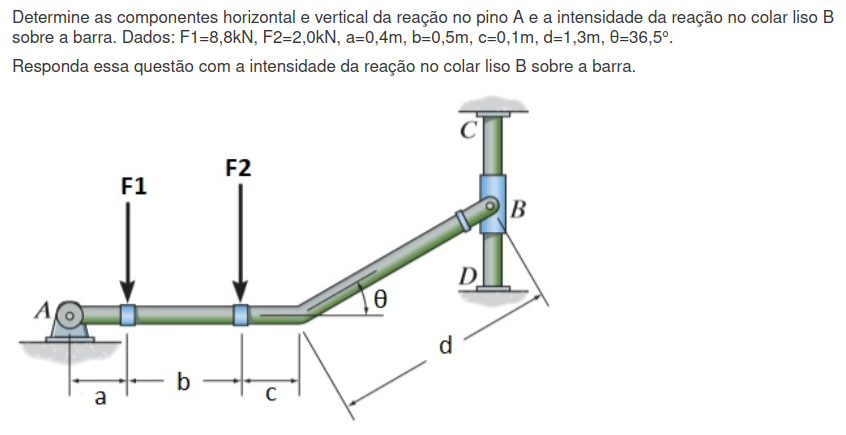

In [400]:
#INput data
a=0.4
b=0.5
c=0.1
d=1.3
thetad=36.5
F1=8.8
F2=2.0

In [401]:
'''
#referencia
a=1
b=2
c=1
d=4
F1=300
F2=450
thetad=30
'''

'\n#referencia\na=1\nb=2\nc=1\nd=4\nF1=300\nF2=450\nthetad=30\n'

In [402]:
#Prova Real
theta=np.deg2rad(thetad)
RAx,RAy,RBx = sy.symbols('RAx RAy RBx')
#a,b,theta, r, F1, F2, F3 = sy.symbols(r'a b \theta r F_1 F_2 F_3')
aplicacao=[
    [0,0,0],
    [a,0,0],
    [a+b,0,0],
    [a+b+c+d*sy.cos(theta),d*sy.sin(theta),0]]
vRA  =vector(RAx,RAy,0)
vF1  =F1*vector(0,-1,0)
vF2  =F2*vector(0,-1,0)
vRB  =vector(RBx,0,0)

Forcas=[vRA,vF1,vF2,vRB]
icognitas=[RAx,RAy,RBx]
res=solveForces(Forcas,aplicacao,icognitas,True)[-1]
resposta(abs(res),'kN')

{RAx: 6.87987713896783, RBx: -6.87987713896783, RAy: 10.8000000000000}
Forcas
[RAx*N.i + RAy*N.j, (-8.8)*N.j, (-2.0)*N.j, RBx*N.i]
Equacoes
[RAx + RBx, RAy - 10.8, -0.773269622776744*RBx - 5.32]
A resposta final é:


6.88kN